#### **EDA (Exploración y Analisis de los Datos)**

**Análisis Exploratorio de Datos del Mercado de Internet en Argentina**

*En este Notebook se realiza un análisis exploratorio de datos (EDA) para identificar duplicados, valores faltantes, outliers y tendencias, así como generar gráficos adecuados para variables cualitativas y cuantitativas.*

### **Tabla de Contenidos**

1. Introducción
2. Importación de Librerías y Configuraciones
3. Carga, Revisión General y Descripción de los Datos
4. Limpieza y Preparación de Datos
5. Análisis Exploratorio (EDA)
6. [Hallazgos Destacados]
7. Visualizaciones Clave y Discusión
8. Conclusiones del EDA - Posibles lineas de Acción
9. Generación de Campos calculados para Facilitar graficos Dashboard PBI

**1. [Introducción]**

•	Contexto: La industria de las telecomunicaciones en Argentina se encuentra en un constante crecimiento, con una adopción masiva de servicios de internet, telefonía móvil y otros medios de comunicación. Para el 2020, Argentina alcanzó alrededor de 62,12 millones de conexiones, ubicándose a la vanguardia a nivel regional.

•	Rol y Objetivo: Asumiendo el papel de Data Analyst para una empresa prestadora de servicios de telecomunicaciones, el objetivo es realizar un Análisis Exploratorio de Datos (EDA) y un dashboard que refleje el comportamiento del sector a nivel nacional y provincial. Este trabajo busca identificar oportunidades de mejora, planificar inversiones y optimizar la calidad de los servicios, con especial atención al acceso a internet y su penetración en hogares y habitantes.

En este sentido, se presentará un EDA detallado y un panel de visualizaciones (dashboard) que apoyen la toma de decisiones y permitan la evaluación de KPIs propuestos.

- [Estructura General Proyecto]

In [25]:
'''
# Estructura del Proyecto

mvp_pi2/
│
├── 📁 data/                    # 📂 Carpeta para almacenamiento general de los datos
│   ├── 📁 raw/                 # 📄 Datos originales (sin modificar)
│   ├── 📁 processed/           # 📄 Datos limpios y listos para análisis
│
├── 📁 virtualenv/              # 📂 Carpeta para almacenamiento de la data del entorno virtual
├── ETL.ipynb                   # 📊 Notebook para Exploración, Transformación y Carga inicial
├── EDA.ipynb                   # 📊 Notebook para Análisis exploratorio            
│
├── functions.py                # 📄 Compendio de Funciones usadas en el ETL y EDA
│
├── requirements.txt            # 📋 Lista de librerias y dependencias requeridas
├── .gitignore                  # 🚫 Archivos/carpetas a ignorar en Git
├── README.md                   # 📖 Descripción general del proyecto
└── Dashboard_KPI_PI_2.pbix     # 📊 Archivo de Power BI con el Dashboard
'''
print("Componentes de la estructura del proyecto:")

Componentes de la estructura del proyecto:


- **EDA.ipynb:** Notebook del EDA, en este archivo se lleva a cabo todo el análisis exploratorio de datos (EDA), 
Carga de los datasets, Limpieza y preparación (tratamiento de duplicados, valores faltantes, outliers, etc.),
Creación de nuevas variables (por ejemplo, tasas de crecimiento y ARPU), Visualizaciones y análisis de tendencias,
distribuciones y correlaciones, Conclusiones preliminares y recomendaciones.

- **ETL.ipynb:** Notebook del ETL, en este archivo se lleva a cabo la extracción, transformación y carga de los datos,
Extracción de los datos de las fuentes originales (por ejemplo, archivos CSV, bases de datos, APIs, etc.),
Limpieza y transformación de los datos (por ejemplo, unificación de formatos, normalización de variables, etc.),
Generación de datasets finales listos para el análisis, Guardado de los datasets en la carpeta data/processed/.

- **data/:** Carpeta que contiene los datasets originales (data/raw/) y los datasets procesados (data/processed/), 
Permite mantener una organización clara de los datos y facilita la reproducibilidad del análisis.

- **virtualenv/:** Carpeta que contiene los archivos del entorno virtual, Permite aislar las dependencias del proyecto
y garantizar la reproducibilidad del análisis.

- **requirements.txt:** Archivo que contiene la lista de librerías y dependencias necesarias para ejecutar el proyecto,
Facilita la instalación de las librerías necesarias en un entorno virtual o en un servidor de producción.

- **functions.py:** Contiene las funciones auxiliares para procesar y analizar la información (por ejemplo, funciones
de validación, creación de columnas o generación de gráficos), Permite una mejor organización y reutilización del código.

- **Dashboard_KPI_PI_2.pbix:** Carpeta que incluye el archivo de Power BI donde se desarrolla el panel interactivo.
Se presentan las principales visualizaciones y KPIs de forma clara y ordenada, con filtros y segmentaciones que
facilitan la exploración de los datos.

- **README.md:** Documento base del repositorio que describe en un nivel alto el proyecto, sus objetivos y la forma de
reproducir los análisis, Explica brevemente la estructura del proyecto, indicando dónde se encuentran los datasets,
el EDA, el dashboard y otros elementos relevantes, Incluye un reporte conciso de los hallazgos principales y de la
funcionalidad de los KPIs implementados.

**2. [Importación de Librerías y Configuraciones]**

In [3]:
import pandas as pd # Importamos librería pandas
import numpy as np # Importamos librería numpy
import ast # Importamos librería ast
from datetime import datetime # Importamos librería datetime
from functions import * # Importamos todas las funciones contenidas en archivo functions.py

*3. [Carga, Revisión General y Descripción de los Datos]**
   - [Lectura de Archivos]

In [4]:
opciones_impresion() # Invocamos la función para mejorar la impresion y que no se recorte la información al imprimir.
# [Lectura de Archivos] importamos los archivos .parquet resultantes del ETL:
df_internet_nacional = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_nacional.parquet')
df_internet_provincias = pd.read_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_provincias.parquet')

   - [Vista Rápida del Dataset, Tipos de Datos, Dimensiones, Estadística Descriptiva y Columnas Principales]

In [ ]:
# Usamos la funcion validar_df para obtener una vista rápida de los datasets:
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_nacional", df_internet_nacional.shape),"\n",validar_df(df_internet_nacional),"\n", df_internet_nacional.head(20),"\n", df_internet_nacional.tail(22),"\n")
print("El dataframe {} tiene una dimensión de: {}".format("df_internet_provincias", df_internet_provincias.shape),"\n",validar_df(df_internet_provincias),"\n", df_internet_provincias.head(4),"\n", df_internet_provincias.tail(4),"\n")
print("\n")

In [ ]:
'''
El dataframe df_internet_nacional tiene una dimensión de: (42, 25) 
                             Tipo de Dato Int Int64 Float Bool DateT Str Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness  Kurtosis   Media            Desviación_Std   Moda           Mínimo         Q1_25%          Q2_50%           Q3_75%           Máximo        Negativos IQR              %OutL_IQR LowerBound        UpperBound        Z-Score   %OutL_Z_Thresh
Año                             int64     42  0      0    0    0      0  NaN    0     42       11       0   NaN             0.024172  -1.186795      2018.761905         3.074756           2014           2014          2016.0           2019.0           2021.0          2024    0                   5.0    0.0               2001.0            2036.0  1.724231    0.0        
Trimestre                       int64     42  0      0    0    0      0  NaN    0     42        4       0   NaN             0.070729  -1.371727         2.452381          1.13056              1              1            1.25              2.0              3.0             4    0                  1.75    0.0                 -4.0              8.25   1.38549    0.0        
Tot_Vel_Media_DL              float64      0  0     42    0    0      0  NaN    0     42       42       0   NaN             1.330087   0.542731        39.334762        43.643195       3.617127       3.617127        6.038428           18.855            51.37        139.25    0             45.331572    0.0          -129.956286        187.364715  2.317117    0.0        
Tot_Acc_ADSL                    int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             -0.49308  -1.323894   2694843.857143   1094346.632094         733491         733491       1730869.0        3061623.0        3713297.5       3803024    0             1982428.5    0.0           -4216416.5         9660583.0  1.813984    0.0        
Tot_Acc_CaModem                 int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN            -0.136182  -1.546603        4433906.0   1319783.049714        2407330        2407330      3146291.75        4535507.0       5857192.25       6073426    0             2710900.5    0.0          -4986409.75       13989893.75   1.55415    0.0        
Tot_Acc_FO                      int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             1.046036  -0.299087   1224693.571429   1321135.967138         139187         139187        171941.0         698946.5        1945689.0       4169958    0             1773748.0    0.0           -5149303.0         7266933.0  2.256366    0.0        
Tot_Acc_Wireless                int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN               0.1788  -1.628079    304293.214286    203202.399993          70749          70749         85390.5         292223.0         515434.0        598682    0              430043.5    0.0           -1204740.0         1805564.5  1.466308    0.0        
Tot_Acc_Otros                   int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN            -0.086408  -1.787841    158186.071429     82363.507846          54300          54300         70430.0         185221.0         244069.5        265328    0              173639.5    0.0            -450488.5          764988.0  1.316611    0.0        
Total                           int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             0.256071  -1.319854   8815922.714286   1733188.753506        6398398        6398398      7218130.75        8720658.0      10388730.75      11633156    0             3170600.0    0.0          -2293669.25       19900530.75  1.645166    0.0        
Periodo                      category      0  0      0    0    0     42   42    0     42       42     NaN     0                  NaN        NaN              NaN              NaN            NaN            NaN             NaN              NaN              NaN           NaN  NaN                   NaN    NaN                  NaN               NaN       NaN    NaN        
Tot_pntrcion_x_c100_Hoga      float64      0  0     42    0    0      0  NaN    0     42       42       0   NaN             0.238753  -1.365423        63.201813         9.950321      49.545821      49.545821       53.784644        62.667764        72.527011         78.89    0             18.742366    0.0            -2.442455         128.75411  1.595763    0.0        
Tot_pntrcion_x_c100_Habi      float64      0  0     42    0    0      0  NaN    0     42       42       0   NaN             0.246389  -1.347855          19.5746         3.268665      15.050104      15.050104       16.519507        19.395586        22.603664         24.79    0              6.084157    0.0            -1.732965         40.856136  1.614916    0.0        
Tot_Acc_rango_0->512_kbps       int64     42  0      0    0    0      0  NaN    0     42       41       0   NaN             2.916638   8.238244     46756.595238     48922.973593          41038           5675        29027.75          34960.0          41057.5        241713    0              12029.75  9.524              -7061.5          77146.75  4.033271  4.762        
Tot_Acc_rango_0.512->1_Mbps     int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             1.084979   0.055308    215615.285714    192134.704593          28521          28521        69951.75         150273.0        279159.25        687619    0              209207.5    0.0           -557670.75         906781.75  2.486408    0.0        
Tot_Acc_rango_1->6_Mbps         int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN            -0.166518   -1.35375   3176364.785714   1552136.429491         840200         840200      1692723.75        3313002.5        4780395.5       5153437    0            3087671.75    0.0           -7570291.5       14043410.75  1.523373    0.0        
Tot_Acc_rango_6->10_Mbps        int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN            -1.289947   1.240613    915481.857143    229375.825017         289182         289182       862345.25         978762.0        1058517.5       1245333    0             196172.25    0.0             273828.5        1647034.25   2.76355    0.0        
Tot_Acc_rango_10->20_Mbps       int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             0.770545     0.5578    884427.642857     451590.03078         101127         101127        677435.5         792972.5        1022656.5       2068087    0              345221.0  2.381            -358227.5         2058319.5  2.652865    0.0        
Tot_Acc_rango_20->30_Mbps       int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             1.105722   0.880793    478365.619048    433434.313766            345            345        135803.5         361249.5         592545.0       1688748    0              456741.5    0.0           -1234421.0         1962769.5   2.82639    0.0        
Tot_Acc_rango_>30_Mbps          int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             0.575531  -1.297937   2909772.261905   3138714.699433          11595          11595         32914.0        1408279.0        5761285.0       8363694    0             5728371.0    0.0          -17152199.0        22946398.0  1.758692    0.0        
Tot_Acc_rango_Otros             int64     42  0      0    0    0      0  NaN    0     42       28      15   NaN             0.147958  -1.156481    154081.071429    132453.955052              0              0             0.0         176235.5         242214.0        414754    0              242214.0    0.0            -726642.0          968856.0  1.991883    0.0        
Tot_Acc_rango                   int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             0.221127  -1.326602   8780865.119048   1772654.726356        6272846        6272846       7151638.0        8720658.0      10388730.75      11633156    0            3237092.75    0.0          -2559640.25        20100009.0  1.628555    0.0        
Tot_B_Ancha_Fija                int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN              0.25149  -1.323499    8794432.52381   1742229.321362        6362108        6362108       7189537.0        8704688.0      10376495.75      11621363    0            3186958.75    0.0          -2371339.25        19937372.0  1.642262    0.0        
Tot_DialUp                      int64     42  0      0    0    0      0  NaN    0     42       35       0   NaN             0.209069  -1.562835     21490.190476     10136.781243          10016           9991         11793.0          21802.5         28593.75         39324    0              16800.75    0.0            -38609.25           78996.0  1.780643    0.0        
Tot_DialUp_+_B_Ancha_Fija       int64     42  0      0    0    0      0  NaN    0     42       42       0   NaN             0.256071  -1.319854   8815922.714286   1733188.753506        6398398        6398398      7218130.75        8720658.0      10388730.75      11633156    0             3170600.0    0.0          -2293669.25       19900530.75  1.645166    0.0        
Ingresos (miles de pesos)     float64      0  0     42    0    0      0  NaN    0     42       42       0   NaN             3.381631  12.292935  50016480.782883  87102080.456403  2984054.20878  2984054.20878  7055326.252462  20475265.732429  44850901.446965  442032166.69    0       37795575.194503  7.143    -106331399.331046  158237627.030473  4.555202  4.762         
     Año   Trimestre  Tot_Vel_Media_DL  Tot_Acc_ADSL  Tot_Acc_CaModem  Tot_Acc_FO  Tot_Acc_Wireless  Tot_Acc_Otros  Total   Periodo         Tot_pntrcion_x_c100_Hoga  Tot_pntrcion_x_c100_Habi  Tot_Acc_rango_0->512_kbps  Tot_Acc_rango_0.512->1_Mbps  Tot_Acc_rango_1->6_Mbps  Tot_Acc_rango_6->10_Mbps  Tot_Acc_rango_10->20_Mbps  Tot_Acc_rango_20->30_Mbps  Tot_Acc_rango_>30_Mbps  Tot_Acc_rango_Otros  Tot_Acc_rango  Tot_B_Ancha_Fija  Tot_DialUp  Tot_DialUp_+_B_Ancha_Fija  Ingresos (miles de pesos)
0   2014  1           3.617127         3697066       2407330          150323       70749             72930         6398398   Ene-Mar 2014  49.545821                 15.050104                  52684                     687619                       5130294                   289182                    101127                        345                     11595                       0               6272846        6362108           36290       6398398                    2.984054e+06             
1   2014  2           3.758712         3708882       2461670          149363       72405             72148         6464468   Abr-Jun 2014  49.861428                 15.163908                  41064                     656408                       5149574                   341689                    147273                        478                     12259                       0               6348745        6428329           36139       6464468                    3.270816e+06             
2   2014  3           3.867265         3714764       2569868          155494       85096             70049         6595271  Jul-Sept 2014  50.672368                 15.428769                  37430                     608018                       5153437                   373372                    182483                        507                     12424                       0               6367671        6559264           36007       6595271                    3.478638e+06             
3   2014  4           4.156888         3764038       2536219          149682       76984             71573         6598496   Oct-Dic 2014  50.499788                 15.394677                  44075                     554749                       5084556                   496251                    276254                       4371                     15229                       0               6475485        6559172           39324       6598496                    3.950441e+06             
4   2015  1           4.350279         3756153       2668248          168188       79098             66045         6737732   Ene-Mar 2015  51.364586                 15.677234                  41158                     516919                       5121423                   571620                    348102                       7643                     16347                       0               6623212        6699714           38018       6737732                    4.876385e+06             
5   2015  2           4.545381         3767821       2756294          150839       82077             59157         6816188   Abr-Jun 2015  51.760266                 15.817234                  40723                     500175                       5138431                   645440                    432762                      10045                     18529                       0               6786105        6783279           32909       6816188                    4.701791e+06             
6   2015  3           4.788911         3788696       2840203          162663       84530             58976         6935068  Jul-Sept 2015  52.459106                 16.050289                  35030                     455777                       5087802                   701187                    539414                      13101                     20677                       0               6852988        6902267           32801       6935068                    5.153739e+06             
7   2015  4           4.990449         3803024       2898226          139187       85726             58668         6984831   Oct-Dic 2015  52.630888                 16.122697                  34243                     427394                       5049640                   726740                    639011                      17568                     22170                       0               6916766        6952289           32542       6984831                    5.376899e+06             
8   2016  1           5.083702         3792493       2806359          164371       85370             58763         6907356   Ene-Mar 2016  51.845452                 15.901802                  30428                     404810                       4944358                   762999                    641646                      27664                     23380                       0               6835285        6874704           32652       6907356                    5.936845e+06             
9   2016  2           5.423531         3782085       3035272          167788       85452             59482         7130079   Abr-Jun 2016  53.342201                 16.371351                  44008                     384221                       5058481                   796998                    785759                      73977                     29020                       0               7172464        7097604           32475       7130079                    6.534241e+06             
10  2016  3           5.938777         3776442       3124855          169898       81455             54300         7206950  Jul-Sept 2016  53.734186                 16.504676                  20104                     294413                       4816081                   936533                    919208                     124564                     31022                       0               7141925        7178340           28610       7206950                    6.912442e+06             
11  2016  4           6.337384         3722794       3210602          178070       85119             55088         7251673   Oct-Dic 2016  53.936019                 16.564000                  20724                     233398                       4673339                   971094                   1038029                     169522                     38590                       0               7144696        7223128           28545       7251673                    7.483980e+06             
12  2017  1           6.624079         3708898       3276251          180146       84813             55746         7305854   Ene-Mar 2017  54.162116                 16.644565                  20653                     230159                       4584534                   975027                   1129987                     210668                     47990                       0               7199018        7277314           28540       7305854                    8.701201e+06             
13  2017  2           7.159956         3723518       3383434          180777       85813             56122         7429664   Abr-Jun 2017  54.901191                 16.882937                  22366                     222766                       4416065                   990281                   1342000                     231604                     98635                       0               7323717        7401134           28530       7429664                    9.678647e+06             
14  2017  3           8.339048         3622575       3670221          193964      106443            131740         7724943  Jul-Sept 2017  56.899221                 17.509032                  19022                     217997                       4062226                  1062810                   1592304                     353480                    245790                       0               7553629        7696594           28349       7724943                    1.006600e+07             
15  2017  4          12.007626         3584311       3818157          211425      155775            100554         7870222   Oct-Dic 2017  57.782351                 17.792977                  15041                     221474                       3773159                  1005545                   1730353                     631946                    337559                  155145               7870222        7842778           27444       7870222                    1.122613e+07             
16  2018  1          13.221340         3574294       3981129          217460      165300             98870         8037053   Ene-Mar 2018  58.820000                 18.120000                   7309                     215406                       3272724                   976956                   2068087                     862010                    397977                  236584               8037053        8009981           27072       8037053                    1.317146e+07             
17  2018  2          13.849540         3557216       4038141          226285      194267             94535         8110444   Abr-Jun 2018  59.162069                 18.240000                   5972                     219467                       3316868                   979416                   1905839                    1000036                    444391                  238455               8110444        8083533           26911       8110444                    1.431947e+07             
18  2018  3          15.360000         3521447       4238171          247366      246181             93870         8347035  Jul-Sept 2018  60.690000                 18.730000                   5675                     220589                       3401277                   859413                   1607137                    1571692                    524777                  156475               8347035        8320223           26812       8347035                    1.541098e+07             
19  2018  4          15.950000         3329027       4313831          388013      264299            178485         8473655   Oct-Dic 2018  61.415807                 18.970000                 138740                     201196                       3337982                   882388                   1472634                    1688748                    599579                  152388               8473655        8451841           21814       8473655                    1.663769e+07              
     Año   Trimestre  Tot_Vel_Media_DL  Tot_Acc_ADSL  Tot_Acc_CaModem  Tot_Acc_FO  Tot_Acc_Wireless  Tot_Acc_Otros  Total    Periodo         Tot_pntrcion_x_c100_Hoga  Tot_pntrcion_x_c100_Habi  Tot_Acc_rango_0->512_kbps  Tot_Acc_rango_0.512->1_Mbps  Tot_Acc_rango_1->6_Mbps  Tot_Acc_rango_6->10_Mbps  Tot_Acc_rango_10->20_Mbps  Tot_Acc_rango_20->30_Mbps  Tot_Acc_rango_>30_Mbps  Tot_Acc_rango_Otros  Tot_Acc_rango  Tot_B_Ancha_Fija  Tot_DialUp  Tot_DialUp_+_B_Ancha_Fija  Ingresos (miles de pesos)
20  2019  1           17.38            3132789       4435439           637099     276419            166389          8648135   Ene-Mar 2019  62.479166                 19.307907                 166573                     195706                       3428759                   882836                   1464748                    1244215                    1138728                 126570                8648135        8626323          21812        8648135                   2.020741e+07             
21  2019  2           20.33            2990457       4635575           760794     308027            265328          8960181   Abr-Jun 2019  64.530000                 19.960000                 202790                      95980                       3444458                   871142                   1169632                    1250366                    1677830                 247983                8960181        8938427          21754        8960181                   2.074312e+07             
22  2019  3           24.18            2909805       4800091           852221     338241            264326          9164684  Jul-Sept 2019  65.787985                 20.360661                 241713                      80599                       3309137                  1026859                    806466                    1141545                    2314898                 243467                9164684        9142891          21793        9164684                   2.165275e+07             
23  2019  4           28.26            2414575       4883869           941295     340144            213298          8793181   Oct-Dic 2019  62.919912                 19.487900                  38272                      28980                       2792307                  1046128                    851619                    1004083                    2830746                 201046                8793181        8783053          10128        8793181                   2.416925e+07             
24  2020  1           37.52            2299457       4903674          1047817     352333            209145          8812426   Ene-Mar 2020  62.856361                 19.483265                  42550                      56170                       2649819                  1022014                    814470                     532309                    3500882                 194212                8812426        8802435           9991        8812426                   2.994622e+07             
25  2020  2           38.32            2295533       5005115          1106725     376667            247016          9031056   Abr-Jun 2020  64.210003                 19.918403                  41038                      48690                       2651502                  1053107                    807775                     523437                    3711499                 194008                9031056        9021040          10016        9031056                   3.210248e+07             
26  2020  3           40.67            2263889       5259351          1170879     413259            248821          9356199  Jul-Sept 2020  66.310000                 20.590000                  41038                      44005                       2637984                  1040017                    799350                     538567                    4053461                 201777                9356199        9346183          10016        9356199                   3.199744e+07             
27  2020  4           42.36            2213949       5371824          1311199     421554            253036          9571562   Oct-Dic 2020  67.622339                 21.010192                  39510                      42185                       2622638                  1073875                    786595                     582420                    4239237                 185102                9571562        9561546          10016        9571562                   3.353970e+07             
28  2021  1           43.11            2175211       5424782          1362976     434548            250455          9647972   Ene-Mar 2021  67.945876                 21.127832                  39487                      41674                       2593477                  1072722                    737930                     595920                    4379965                 186797                9647972        9637956          10016        9647972                   3.667637e+07             
29  2021  2           45.63            2018587       5641731          1472246     476968            253552          9863084   Abr-Jun 2021  69.240183                 21.547939                  40172                      42024                       2531271                  1080279                    693277                     647401                    4661291                 167369                9863084        9852702          10382        9863084                   3.823967e+07             
30  2021  3           48.46            1950631       5826257          1566048     492415            250190         10085541  Jul-Sept 2021  70.578853                 21.982550                  40174                      41437                       2550229                  1095772                    710122                     536364                    4948174                 163269               10085541       10075184          10357       10085541                   4.299994e+07             
31  2021  4           52.34            1657615       5984240          2072236     523107            252596         10489794   Oct-Dic 2021  73.176397                 22.810702                  41262                      28521                       1413208                  1245333                    976539                     558358                    6032322                 194251               10489794       10476933          12861       10489794                   4.546789e+07             
32  2022  1           55.11            1533240       6073426          2219533     545814            251996         10624009   Ene-Mar 2022  73.878803                 23.049171                  34890                     104840                       1263273                  1209148                    967508                     509830                    6336187                 198333               10624009       10611390          12619       10624009                   5.521931e+07             
33  2022  2           58.44            1468333       5979214          2723285     556243            231609         10958684   Abr-Jun 2022  75.965424                 23.720442                  33667                      99498                       1193090                  1197030                    856562                     485321                    6741922                 351594               10958684       10946248          12436       10958684                   6.041950e+07             
34  2022  3           62.46            1395277       6031970          2871541     557110            235230         11091128  Jul-Sept 2022  76.640000                 23.950000                  33013                      96727                       1161370                  1151906                    823505                     479822                    6995750                 349035               11091128       11078691          12437       11091128                   6.408678e+07             
35  2022  4          106.56            1315373       6037457          3060575     572969            221740         11208114   Oct-Dic 2022  77.210000                 24.150000                  31981                      85668                       1075272                  1109421                    765015                     335573                    7410902                 394282               11208114       11195668          12446       11208114                   7.244348e+07             
36  2023  1          110.50            1204417       6002582          3243411     576647            214838         11241895   Ene-Mar 2023  77.200000                 24.170000                  31437                      82048                       1001553                  1060321                    729194                     357769                    7564819                 414754               11241895       11229459          12436       11241895                   1.041350e+08             
37  2023  2          123.95            1006509       5997149          3463988     581823            202428         11251897   Abr-Jun 2023  77.020000                 24.140000                  30827                      79405                        963510                  1028250                    734125                     364730                    7775095                 275955               11251897       11239781          12116       11251897                   1.180603e+08             
38  2023  3          129.67             897895       6018832          3708718     581436            200027         11406908  Jul-Sept 2023  77.840000                 24.410000                  30274                      80609                        945608                   998725                    720084                     350918                    8003269                 277421               11406908       11395115          11793       11406908                   1.331066e+08             
39  2023  4          139.04             836390       6022532          3908183     585760            194796         11547661   Oct-Dic 2023  78.560000                 24.660000                  29708                      71742                        900253                   978108                    697232                     350290                    8224736                 295592               11547661       11535868          11793       11547661                   1.673760e+08             
40  2024  1          139.15             774475       5986957          4015101     598682            257941         11633156   Ene-Mar 2024  78.890000                 24.790000                  28801                      69355                        866152                   950930                    672155                     353896                    8363694                 328173               11633156       11621363          11793       11633156                   3.461990e+08             
41  2024  2          139.25             733491       5867504          4169958     593197            191957         11556107   Abr-Jun 2024  78.130000                 24.570000                  28151                      67024                        840200                   911374                    662649                     348253                    8357088                 341368               11556107       11544314          11793       11556107                   4.420322e+08              

El dataframe df_internet_provincias tiene una dimensión de: (1032, 21) 
                                    Tipo de Dato Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda       Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos IQR        %OutL_IQR LowerBound UpperBound  Z-Score    %OutL_Z_Thresh
Año                                    int64     1032  0        0  0    0        0   NaN    0    1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596       2014      2014     2016.0     2019.0     2022.0        2024    0             6.0     0.0       1998.0      2040.0   1.648044    0.0        
Trimestre                              int64     1032  0        0  0    0        0   NaN    0    1032        4     0   NaN              0.028936   -1.383487       2.488372       1.128874          1         1        1.0        2.0        4.0           4    0             3.0     0.0         -8.0        13.0   1.339708    0.0        
Provincia                           category        0  0        0  0    0     1032  1032    0    1032       24   NaN     0                   NaN         NaN            NaN            NaN        NaN       NaN        NaN        NaN        NaN         NaN  NaN             NaN     NaN          NaN         NaN        NaN    NaN        
Tot_Vel_Media_DL_Trim_x_Prov         float64        0  0     1008  0    0        0   NaN   24    1008     1003     0   NaN              2.637143    8.748819      24.720245      33.660764   3.476761  2.573729   4.866698  10.089315  29.875292      234.44    0       25.008594   3.075   -70.159086  104.901075   6.233485  1.488        
Tot_Acc_ADSL_x_Prov                  float64        0  0     1007  0    0        0   NaN   25    1007      897     0   NaN              4.661572   23.906101  112930.860973  236292.179471    11432.0    2230.0    19789.5    43967.0    87220.0   1586343.0    0         67430.5  11.023    -182502.0    289511.5    6.23865  2.284        
Tot_Acc_CaModem_x_Prov               float64        0  0     1007  0    0        0   NaN   25    1007      890    14   NaN              3.869341   16.019831  182158.281033  446005.777989    34984.0       0.0    11020.5    40750.0    76783.5   2797700.0    0         65763.0    14.3    -186268.5    274072.5   5.867281  2.781        
Tot_Acc_FO_x_Prov                    float64        0  0     1007  0    0        0   NaN   25    1007      754     9   NaN              7.075133   56.751358   48556.986097   175869.37569       19.0       0.0      354.0     3015.0    29257.0   1849476.0    0         28903.0   8.838     -86355.0    115966.0  10.245183  1.787        
Tot_Acc_Wireless_x_Prov              float64        0  0     1007  0    0        0   NaN   25    1007      716    38   NaN              3.262511   12.686098   12542.229394   20909.412762        0.0       0.0      813.0     5224.0    14367.5    138638.0    0         13554.5   5.958     -39850.5     55031.0   6.033571  2.681        
Tot_Acc_Otros_x_Prov                 float64        0  0     1007  0    0        0   NaN   25    1007      672     0   NaN              3.106073   11.805812    6497.041708   11239.855091       34.0       2.0      334.5     1920.0     7548.0     73415.0    0          7213.5   5.561     -21306.0     29188.5    5.95659  1.887        
Tot_Acc_x_Prov                       float64        0  0     1007  0    0        0   NaN   25    1007      999     0   NaN              3.883395   15.918066  362685.399206  777313.747461    13307.0   12557.0    62411.5   113915.0   195652.0   5011620.0    0        133240.5  14.796    -337310.0    595373.5   5.983742  4.071        
Tot_pntrcion_x_c100_Habi_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      991     0   NaN              1.510943    2.859164      15.727248       9.240063      15.12     2.723   9.018188  13.674812  20.323973   52.236739    0       11.305785     0.0   -24.899167   54.241328   3.953194    3.9        
Tot_pntrcion_x_c100_Hoga_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      994     0   NaN              0.702706    0.208253      52.794973      24.135063  32.491996   9.51397  33.957657  50.133004  67.010861  124.061394    0       33.053204     0.0   -65.201955  166.170473   2.954294    0.0        
Tot_Acc_rango_0->512_kbps_x_Prov     float64        0  0     1000  0    0        0   NaN   32    1000      387     0   NaN             13.835871  218.415976       1953.317   12676.575806       18.0       6.0      43.25      107.0     466.25    238920.0    0           423.0    11.7     -1225.75     1735.25  18.702626    0.4        
Tot_Acc_rango_0.512->1_Mbps_x_Prov   float64        0  0     1000  0    0        0   NaN   32    1000      764    50   NaN              4.155821   19.680779       8864.257   20312.520997        0.0       0.0     389.75     2061.0     6851.5   171244.48    0         6461.75     8.8     -18995.5    26236.75   7.998095    3.5        
Tot_Acc_rango_1->6_Mbps_x_Prov       float64        0  0     1000  0    0        0   NaN   32    1000      991     0   NaN              4.881266   25.635111     132772.534  322256.911138    14014.0    1124.0    23812.5    42132.5   83710.25  2299705.32    0        59897.75     9.3   -155880.75    263403.5   6.727605    3.0        
Tot_Acc_rango_6->10_Mbps_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      917    36   NaN              2.757707    7.978694       38408.51   64156.365883        0.0       0.0    3876.75    13932.0    42593.5    403575.0    0        38716.75     6.8    -112273.5   158743.75   5.694668    3.4        
Tot_Acc_rango_10->20_Mbps_x_Prov     float64        0  0     1000  0    0        0   NaN   32    1000      891    69   NaN              4.956438   30.424872      37138.329   88290.744464        0.0       0.0    2706.75    10503.0   26463.75    886678.0    0         23757.0     8.4    -68564.25    97734.75   9.626884    2.1        
Tot_Acc_rango_20->30_Mbps_x_Prov     float64        0  0     1000  0    0        0   NaN   32    1000      741    98   NaN              7.631491   75.327419       20091.33   69299.281156        0.0       0.0      43.75     1658.0   10109.25    949093.0    0         10065.5    11.0    -30152.75    40305.75  13.412354    1.7        
Tot_Acc_rango_>30_Mbps_x_Prov        float64        0  0     1000  0    0        0   NaN   32    1000      717   106   NaN              6.213321   42.753053     122209.765  465749.959124        0.0       0.0       15.0     4253.5   43399.25   4068292.0    0        43384.25     9.6   -130137.75    173552.0   8.476773    1.8        
Tot_Acc_rango_Otros_Mbps_x_Prov      float64        0  0     1000  0    0        0   NaN   32    1000      459   459   NaN              5.021002   30.379387      6514.3833   15296.658446        0.0       0.0        0.0      373.5    6800.75    125547.0    0         6800.75     4.9    -20402.25     27203.0   7.785503    1.7        
Tot_Acc_rango_Mbps_x_Prov            float64        0  0     1000  0    0        0   NaN   32    1000      995     0   NaN              3.880622   15.869643     367909.447  789934.841211    14029.0   12406.0   62342.25   113620.5  196919.75   5044557.0    0        134577.5    14.9   -341390.25   600652.25   5.923258    3.8         
    Año   Trimestre Provincia         Tot_Vel_Media_DL_Trim_x_Prov  Tot_Acc_ADSL_x_Prov  Tot_Acc_CaModem_x_Prov  Tot_Acc_FO_x_Prov  Tot_Acc_Wireless_x_Prov  Tot_Acc_Otros_x_Prov  Tot_Acc_x_Prov  Tot_pntrcion_x_c100_Habi_x_Prov  Tot_pntrcion_x_c100_Hoga_x_Prov  Tot_Acc_rango_0->512_kbps_x_Prov  Tot_Acc_rango_0.512->1_Mbps_x_Prov  Tot_Acc_rango_1->6_Mbps_x_Prov  Tot_Acc_rango_6->10_Mbps_x_Prov  Tot_Acc_rango_10->20_Mbps_x_Prov  Tot_Acc_rango_20->30_Mbps_x_Prov  Tot_Acc_rango_>30_Mbps_x_Prov  Tot_Acc_rango_Otros_Mbps_x_Prov  Tot_Acc_rango_Mbps_x_Prov
0  2014  1             Buenos Aires  3.733133                      1567685.0            1000879.0               120960.0           16528.0                  33824.0               2739876.0       16.692346                         54.570073                       8469.0                            171244.48                           2279875.0                       121787.12                        38923.32                          206.16                            4037.0                         0.0                              2624542.08               
1  2014  1          Capital Federal  4.024082                       445569.0             820161.0                17767.0            1866.0                  14555.0               1299918.0       42.655072                        112.254123                        852.0                             88825.52                           1096050.0                        70292.88                        38797.68                           54.84                            6208.0                         0.0                              1301080.92               
2  2014  1                Catamarca  2.802734                        24126.0                 46.0                   17.0               0.0                     43.0                 24232.0        6.184615                         24.251751                         19.0                              9147.00                             13330.0                         1672.00                           64.00                            0.00                               0.0                         0.0                                24232.00               
3  2014  1                    Chaco  3.255837                        52971.0               9497.0                   30.0               0.0                     58.0                 62556.0        5.553671                         20.718539                        438.0                             15849.00                             40869.0                         4644.00                          741.00                            5.00                               0.0                         0.0                                62546.00                
       Año   Trimestre Provincia             Tot_Vel_Media_DL_Trim_x_Prov  Tot_Acc_ADSL_x_Prov  Tot_Acc_CaModem_x_Prov  Tot_Acc_FO_x_Prov  Tot_Acc_Wireless_x_Prov  Tot_Acc_Otros_x_Prov  Tot_Acc_x_Prov  Tot_pntrcion_x_c100_Habi_x_Prov  Tot_pntrcion_x_c100_Hoga_x_Prov  Tot_Acc_rango_0->512_kbps_x_Prov  Tot_Acc_rango_0.512->1_Mbps_x_Prov  Tot_Acc_rango_1->6_Mbps_x_Prov  Tot_Acc_rango_6->10_Mbps_x_Prov  Tot_Acc_rango_10->20_Mbps_x_Prov  Tot_Acc_rango_20->30_Mbps_x_Prov  Tot_Acc_rango_>30_Mbps_x_Prov  Tot_Acc_rango_Otros_Mbps_x_Prov  Tot_Acc_rango_Mbps_x_Prov
1028  2024  4                     Santa Fe NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                               468.0                             6845.0                              82343.0                         164019.0                         59636.0                           22135.0                           557629.0                       16426.0                          909501.0                 
1029  2024  4          Santiago Del Estero NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                               180.0                             1173.0                              13018.0                          53980.0                         24514.0                            5794.0                            23641.0                         930.0                          123230.0                 
1030  2024  4             Tierra Del Fuego NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                                22.0                              834.0                              10283.0                          12618.0                         19536.0                            6085.0                             4342.0                        7879.0                           61599.0                 
1031  2024  4                      Tucuman NaN                           NaN                  NaN                     NaN                NaN                      NaN                   NaN             NaN                              NaN                                39.0                             1089.0                              18850.0                          22817.0                         24476.0                            1583.0                           196919.0                         562.0                          266335.0                  
'''

**4. [Limpieza y Preparación de Datos]**
  - En el proceso de preparacion de datos creamos un campo "Fecha" con ayuda de los campos "Año" y "Trimestre" y se le hace casting a tipo "datetime", adicionalmente s ele ordena de forma ascendente (de menor a mayor)
  - [Detección y Tratamiento de Duplicados, Nulls, Ceros, Infinitos, Vacios, Imputaciones, Casting]:
En la fase de ETL se revisaron los dataframe crudos del archivo df_internet y se identificó:
    - En el campo "Año" en varias hojas se encontraron inconsistencias en su digitación y contenido (*, texto, años que no han ocurido) por lo cual se realizo normalización de texto y casting a tipo "int64" con lo cual se estandarizó el campo.
    - El campo "Provincia" se le realizó tratamiento a sus textos homogenizandolos a estilo capital, eliminando redundnacias entre Siglas y nombres como por ejemplo "CABA" o "Caba" rpor "Capital Federal" y se le realizó casting a tipo "Category" ya que igualmente es una variable tipo Categorica nominal.
    - En esta fase de EDA se identificaron varios campos con multiples Null para los cuales se les imputo con el valor de la media aritmetica:
      campos_a_imputar =["Tot_Vel_Media_DL_Trim_x_Prov","Tot_Acc_ADSL_x_Prov","Tot_Acc_CaModem_x_Prov",
      "Tot_Acc_FO_x_Prov","Tot_Acc_Wireless_x_Prov","Tot_Acc_Otros_x_Prov","Tot_Acc_x_Prov",
      "Tot_pntrcion_x_c100_Habi_x_Prov","Tot_pntrcion_x_c100_Hoga_x_Prov","Tot_Acc_rango_0->512_kbps_x_Prov",
      "Tot_Acc_rango_0.512->1_Mbps_x_Prov","Tot_Acc_rango_1->6_Mbps_x_Prov","Tot_Acc_rango_6->10_Mbps_x_Prov",
      "Tot_Acc_rango_10->20_Mbps_x_Prov","Tot_Acc_rango_20->30_Mbps_x_Prov","Tot_Acc_rango_>30_Mbps_x_Prov",
      "Tot_Acc_rango_Otros_Mbps_x_Prov","Tot_Acc_rango_Mbps_x_Prov".

      - Se crea la columna "Fecha" con ayuda de los campos "Año" y "Trimestre" y se le hace casting a tipo "datetime", adicionalmente s ele ordena de forma ascendente (de menor a mayor)
      - Valores nulos y duplicados: Se descarta duplicidad en los datos Categoricos de las Provincias, en el caso de los datos nulos son pocas las ocurrencias.
   

In [ ]:
from functions import *
# Creamos la columna "Fecha" en el DataFrame "df_internet_nacional" para su uso en los graficos de series temporales:
df_internet_nacional = crear_fecha_trimestral_df(df_internet_nacional,"Año","Trimestre")

# Creamos la columna "Fecha" en el DataFrame "df_internet_provincias" para su uso en los graficos de series temporales:
df_internet_provincias = crear_fecha_trimestral_df(df_internet_provincias,"Año","Trimestre")

- Se imputan los datos nulos de los campos "Tot_Vel_Media_DL_Trim_x_Prov, Tot_Acc_ADSL_x_Prov, Tot_Acc_CaModem_x_Prov, Tot_Acc_FO_x_Prov, Tot_Acc_Wireless_x_Prov, Tot_Acc_Otros_x_Prov, Tot_Acc_x_Prov, Tot_Acc_rango_0->512_kbps_x_Prov, Tot_Acc_rango_0.512->1_Mbps_x_Prov, Tot_Acc_rango_1->6_Mbps_x_Prov, Tot_Acc_rango_6->10_Mbps_x_Prov, Tot_Acc_rango_10->20_Mbps_x_Prov, Tot_Acc_rango_20->30_Mbps_x_Prov, Tot_Acc_rango_>30_Mbps_x_Prov, Tot_Acc_rango_Otros_Mbps_x_Prov, Tot_Acc_rango_Mbps_x_Prov" en el dataframe "df_internet_provincias" por el metodo kNN ya que son campos que por su valor de Kurtosis y Skewness se deduce tienen una distribucioon fuertemete asimetrica:

In [ ]:
# Lista de campos del df_internet_provincias con alta Kurtosis (>3) y Skewness (>1):

campos_a_imputar_kNN = [
    "Tot_Vel_Media_DL_Trim_x_Prov",
    "Tot_Acc_ADSL_x_Prov",
    "Tot_Acc_CaModem_x_Prov",
    "Tot_Acc_FO_x_Prov",
    "Tot_Acc_Wireless_x_Prov",
    "Tot_Acc_Otros_x_Prov",
    "Tot_Acc_x_Prov",
    "Tot_Acc_rango_0->512_kbps_x_Prov",
    "Tot_Acc_rango_0.512->1_Mbps_x_Prov",
    "Tot_Acc_rango_1->6_Mbps_x_Prov",
    "Tot_Acc_rango_6->10_Mbps_x_Prov",
    "Tot_Acc_rango_10->20_Mbps_x_Prov",
    "Tot_Acc_rango_20->30_Mbps_x_Prov",
    "Tot_Acc_rango_>30_Mbps_x_Prov",
    "Tot_Acc_rango_Otros_Mbps_x_Prov",
    "Tot_Acc_rango_Mbps_x_Prov"
]
# Imputamos valores nulos de los campos con alta Kurtosis y Skewness con la tecnica kNN del df_internet_provincias:
imputador_k_NN(df_internet_provincias, campos_a_imputar_kNN, k=5, weights="uniform")

- Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Hoga_x_Prov" con su media por mostrar una distribucion simetrica deducida de su kurtosis(<3), skewness(≈0), grafico de caja y bigotes:


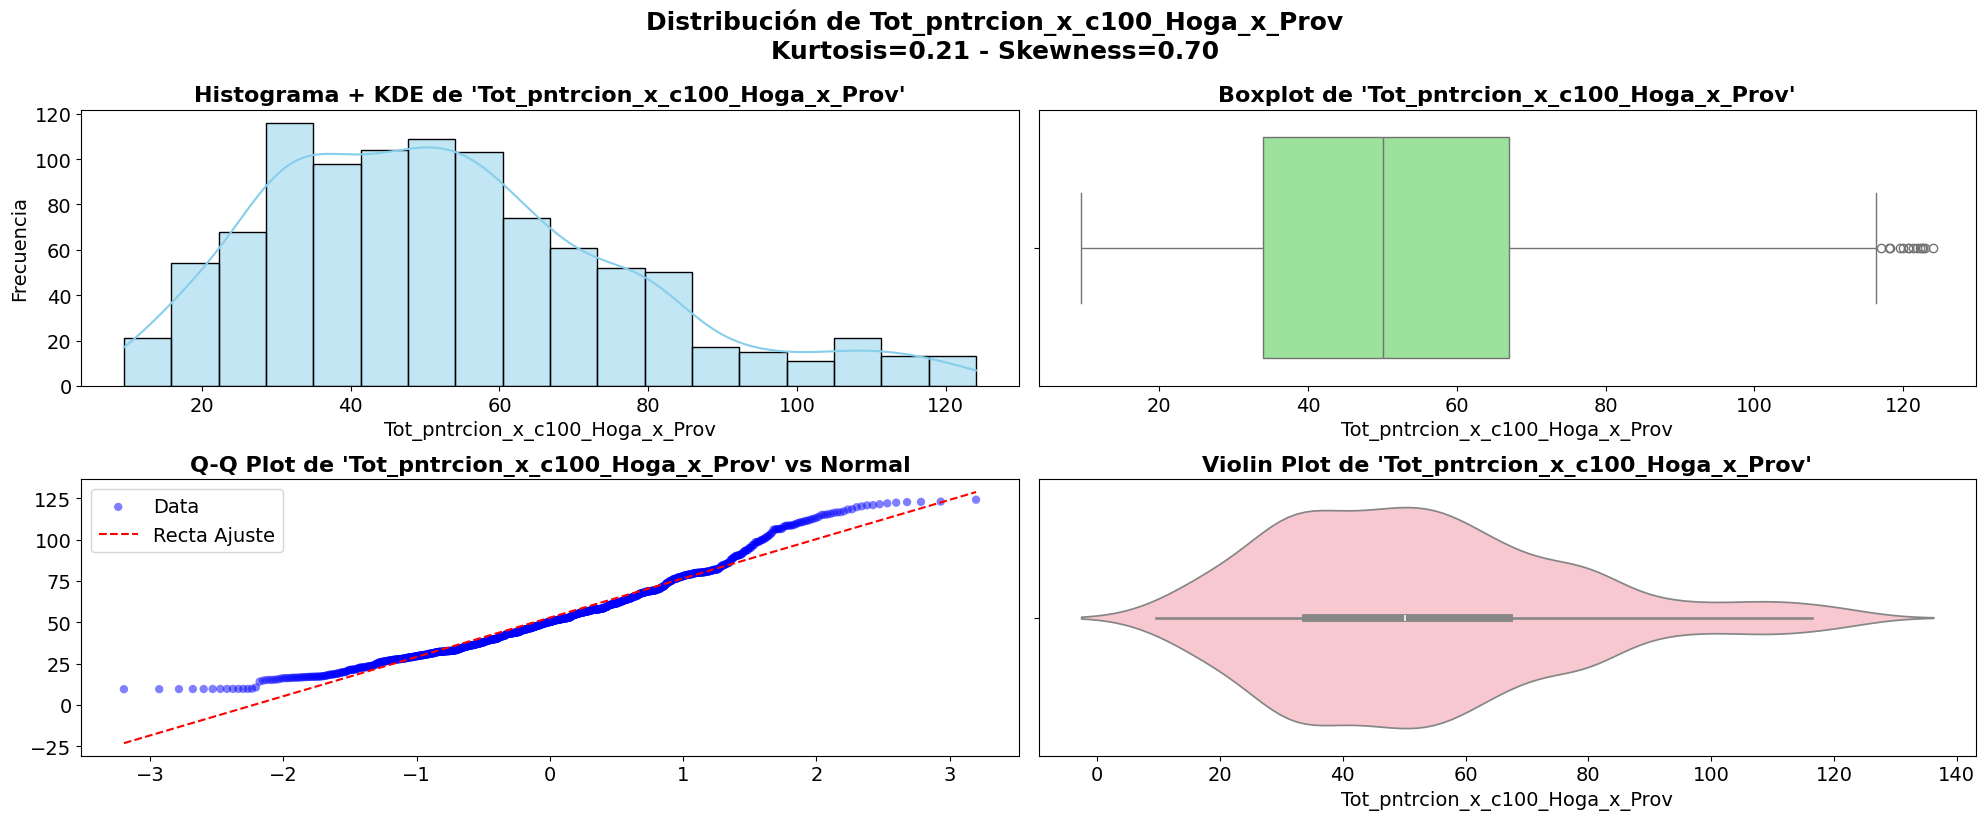

In [8]:
visualizacion_distribucion(df_internet_provincias, "Tot_pntrcion_x_c100_Hoga_x_Prov", titulo="Distribución de Tot_pntrcion_x_c100_Hoga_x_Prov")
# Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Hoga_x_Prov" con su media por mostrar una distribucion simetrica:
df_internet_provincias = imputar_valor(df_internet_provincias, ["Tot_pntrcion_x_c100_Hoga_x_Prov"], metodo="media")

- Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Habi_x_Prov" con su mediana por mostrar una distribucion asimetrica deducida de su kurtosis(2.85<3) y skewness(≈1.51), y representacion grafica:

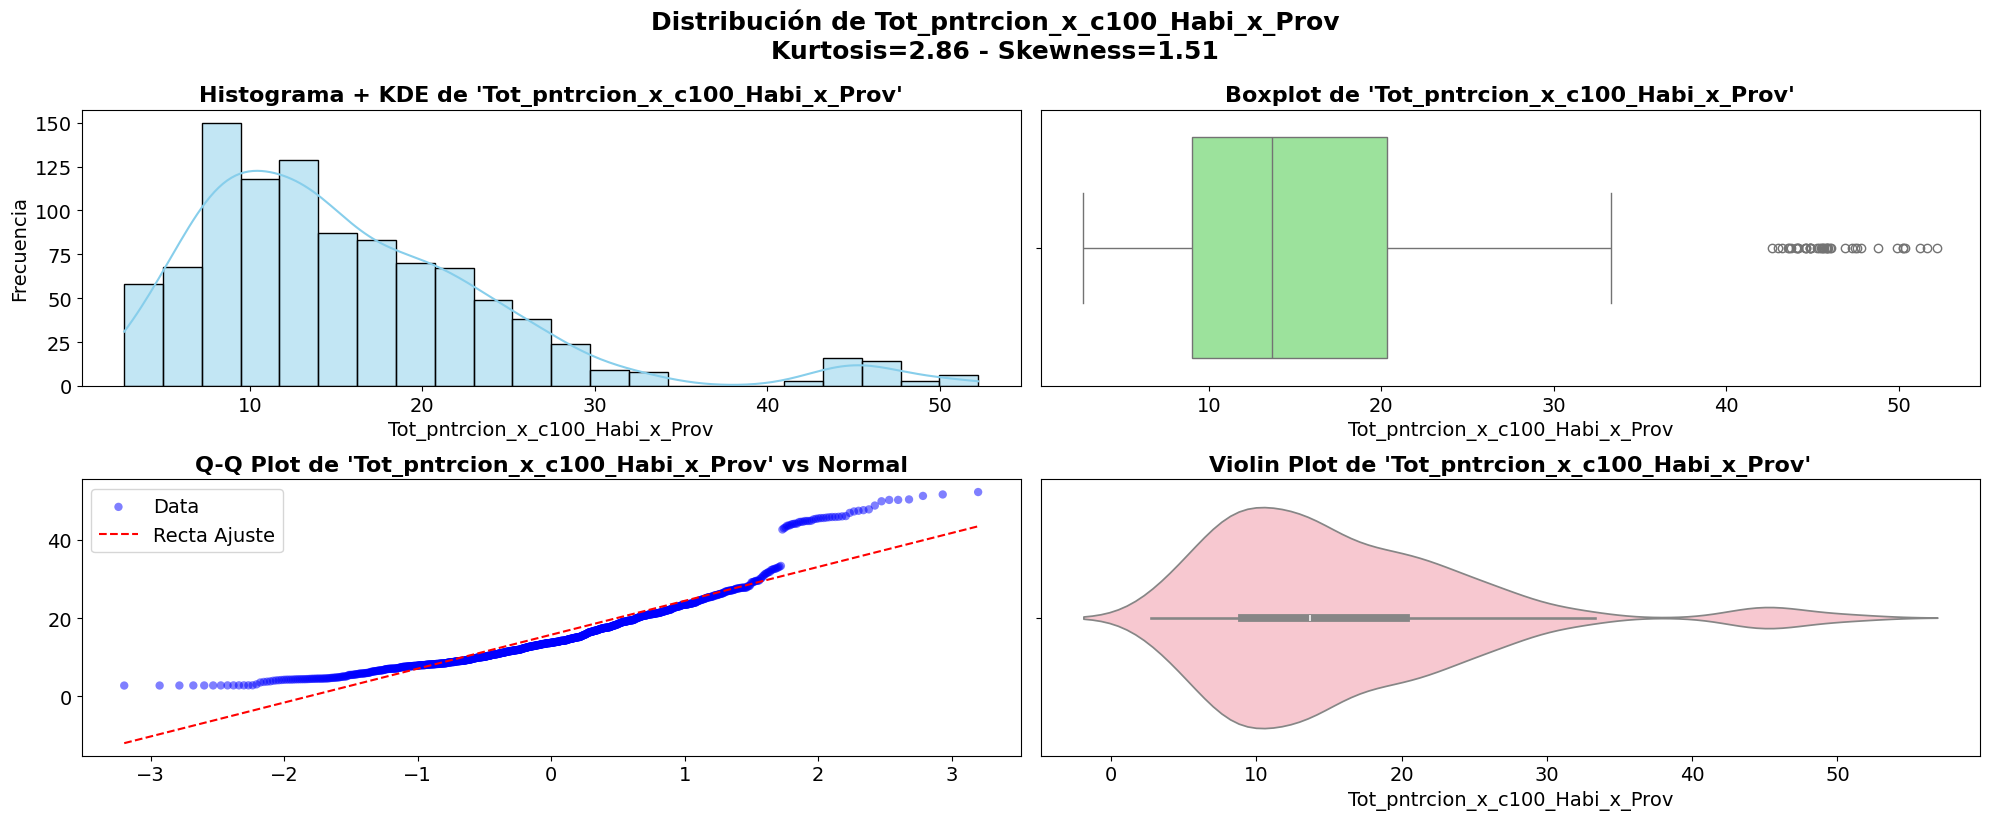

In [9]:
visualizacion_distribucion(df_internet_provincias, "Tot_pntrcion_x_c100_Habi_x_Prov", titulo="Distribución de Tot_pntrcion_x_c100_Habi_x_Prov")
# Imputamos valores nulos del campo "Tot_pntrcion_x_c100_Habi_x_Prov" con su mediana por mostrar una distribucion fuertemente asimetrica:
df_internet_provincias = imputar_valor(df_internet_provincias, ["Tot_pntrcion_x_c100_Habi_x_Prov"],metodo="mediana")

In [ ]:
print(validar_df(df_internet_provincias)) # Validamos el DataFrame df_internet_provincias luego de las imputaciones de nulos

In [34]:
'''
                                   Tipo de Dato    Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda       Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos IQR        %OutL_IQR LowerBound UpperBound  Z-Score    %OutL_Z_Thresh
Fecha                               datetime64[ns]     0  0        0  0    1032     0   NaN   0     1032       43   NaN   NaN                   NaN         NaN            NaN            NaN        NaN       NaN        NaN        NaN        NaN         NaN  NaN             NaN     NaN          NaN         NaN        NaN    NaN        
Año                                          int64  1032  0        0  0       0     0   NaN   0     1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596       2014      2014     2016.0     2019.0     2022.0        2024    0             6.0     0.0       1998.0      2040.0   1.648044    0.0        
Trimestre                                    int64  1032  0        0  0       0     0   NaN   0     1032        4     0   NaN              0.028936   -1.383487       2.488372       1.128874          1         1        1.0        2.0        4.0           4    0             3.0     0.0         -8.0        13.0   1.339708    0.0        
Provincia                                 category     0  0        0  0       0  1032  1032   0     1032       24   NaN     0                   NaN         NaN            NaN            NaN        NaN       NaN        NaN        NaN        NaN         NaN  NaN             NaN     NaN          NaN         NaN        NaN    NaN        
Tot_Vel_Media_DL_Trim_x_Prov               float64     0  0     1032  0       0     0   NaN   0     1032     1026     0   NaN              2.510488    7.803242       25.96388      34.907721   3.476761  2.573729    4.89503  10.647459   31.11992      234.44    0       26.224891   2.519   -73.779642  109.794592   5.975102  1.647        
Tot_Acc_ADSL_x_Prov                        float64     0  0     1032  0       0     0   NaN   0     1032      920     0   NaN               4.71483   24.514623  111200.410271  233828.620956    11432.0    2230.0    19470.5    42716.4   84186.75   1586343.0    0        64716.25  11.047   -174678.25    278335.5   6.311707  2.229        
Tot_Acc_CaModem_x_Prov                     float64     0  0     1032  0       0     0   NaN   0     1032      914    14   NaN              3.865684   15.969536   184165.45814  449670.911229    34984.0       0.0    11305.0    41517.0   77518.25   2797700.0    0        66213.25  14.438   -187334.75    276158.0   5.814923   2.81        
Tot_Acc_FO_x_Prov                          float64     0  0     1032  0       0     0   NaN   0     1032      778     9   NaN              6.867065   53.248048   51458.653295  182124.782715       19.0       0.0     364.75     3173.5   31687.75   1849476.0    0         31323.0   8.236    -93604.25   125656.75   9.877234  1.841        
Tot_Acc_Wireless_x_Prov                    float64     0  0     1032  0       0     0   NaN   0     1032      739    38   NaN              3.221378   12.330309   12868.401163   21268.535164        0.0       0.0      911.0     5569.5   14784.25    138638.0    0        13873.25   6.008    -40708.75     56404.0   5.916279  2.713        
Tot_Acc_Otros_x_Prov                       float64     0  0     1032  0       0     0   NaN   0     1032      696     0   NaN              3.121881   11.874563     6552.54845   11331.610973       34.0       2.0     345.75     1935.5    7563.75     73415.0    0          7218.0    5.62    -21308.25    29217.75   5.903386  1.938        
Tot_Acc_x_Prov                             float64     0  0     1032  0       0     0   NaN   0     1032     1023     0   NaN               3.88466   15.940773  366245.471318  783142.506809    13307.0   12557.0   62661.75   114414.0   197756.3   5011620.0    0       135094.55  14.826    -342621.9   603039.95   5.934586   4.07        
Tot_pntrcion_x_c100_Habi_x_Prov            float64     0  0     1032  0       0     0   NaN   0     1032      991     0   NaN              1.551997    3.071142      15.663606       9.102499  13.674812     2.723   9.117508  13.674812  20.064977   52.236739    0       10.947469     0.0     -23.7249   52.907385    4.01987  3.973        
Tot_pntrcion_x_c100_Hoga_x_Prov            float64     0  0     1032  0       0     0   NaN   0     1032      994     0   NaN              0.713827    0.310971      52.794973      23.757561  52.794973   9.51397  34.888623  51.157509   65.78576  124.061394    0       30.897137     0.0   -57.802788  158.477172   3.001191  0.097        
Tot_Acc_rango_0->512_kbps_x_Prov           float64     0  0     1032  0       0     0   NaN   0     1032      418     0   NaN             13.895666  221.942623    2084.870543   12518.947709       18.0       6.0       47.0      109.0      517.0    238920.0    0           470.0  13.081      -1363.0      1927.0  18.927306  0.388        
Tot_Acc_rango_0.512->1_Mbps_x_Prov         float64     0  0     1032  0       0     0   NaN   0     1032      795    50   NaN               4.16533   19.789283    8910.376938   20172.976914        0.0       0.0     434.75     2411.0    6878.25   171244.48    0          6443.5   8.721    -18895.75    26208.75   8.051009  3.488        
Tot_Acc_rango_1->6_Mbps_x_Prov             float64     0  0     1032  0       0     0   NaN   0     1032     1022     0   NaN              4.960265    26.54234  131237.137016   317489.28936    14014.0    1124.0    24231.5    44163.5    83659.5  2299705.32    0         59428.0   9.302    -154052.5    261943.5   6.833363  3.101        
Tot_Acc_rango_6->10_Mbps_x_Prov            float64     0  0     1032  0       0     0   NaN   0     1032      947    36   NaN              2.711396    7.809679   39469.803101   63816.029177        0.0       0.0    4086.75    15036.0   47003.75    403575.0    0         42917.0   6.202   -124664.25   175754.75   5.708311  3.391        
Tot_Acc_rango_10->20_Mbps_x_Prov           float64     0  0     1032  0       0     0   NaN   0     1032      920    69   NaN              4.957293   30.762142   38039.147481    87261.41912        0.0       0.0     2959.5    11321.5   28437.25    886678.0    0        25477.75   7.946    -73473.75    104870.5   9.729962  2.035        
Tot_Acc_rango_20->30_Mbps_x_Prov           float64     0  0     1032  0       0     0   NaN   0     1032      770    98   NaN              7.709744   77.244492   20400.505426   68308.580092        0.0       0.0       49.0     1888.5   12415.75    949093.0    0        12366.75  10.368    -37051.25     49516.0  13.602139  1.647        
Tot_Acc_rango_>30_Mbps_x_Prov              float64     0  0     1032  0       0     0   NaN   0     1032      745   106   NaN              5.484584   34.572837  149928.042636  494227.435932        0.0       0.0       21.0     5004.0   51135.75   4068292.0    0        51114.75  11.047   -153323.25    204480.0   7.932105  1.938        
Tot_Acc_rango_Otros_Mbps_x_Prov            float64     0  0     1032  0       0     0   NaN   0     1032      481   459   NaN              4.539613   25.530773    7319.904748   15957.183298        0.0       0.0        0.0      659.0    7602.25    125547.0    0         7602.25   5.136    -22806.75     30409.0   7.412613  1.744        
Tot_Acc_rango_Mbps_x_Prov                  float64     0  0     1032  0       0     0   NaN   0     1032     1026     0   NaN              3.676319   14.548352  397348.142248  804306.319278    14029.0   12406.0   63169.25   116359.0  207891.25   5044557.0    0        144722.0  16.957   -370996.75   642057.25   5.780711  3.682        
'''

'\n                                   Tipo de Dato    Int   Int64 Float Bool DateT Str   Ctgory Nulos No_Nulos Únicos Ceros Vacíos (string) Skewness   Kurtosis    Media          Desviación_Std Moda       Mínimo    Q1_25%     Q2_50%     Q3_75%     Máximo      Negativos IQR        %OutL_IQR LowerBound UpperBound  Z-Score    %OutL_Z_Thresh\nFecha                               datetime64[ns]     0  0        0  0    1032     0   NaN   0     1032       43   NaN   NaN                   NaN         NaN            NaN            NaN        NaN       NaN        NaN        NaN        NaN         NaN  NaN             NaN     NaN          NaN         NaN        NaN    NaN        \nAño                                          int64  1032  0        0  0       0     0   NaN   0     1032       11     0   NaN              0.015282   -1.201691    2018.883721        3.10596       2014      2014     2016.0     2019.0     2022.0        2024    0             6.0     0.0       1998.0      2040.0   1.648044   

- [Tratamiento de Outliers]: Se valida con los indicadores de Kurtosis y Skewness la tendencia de su distribución y posteriormente validamos bajo las tecnicas de IQR y Z-Score la presencia de posibles outliers. Para los casos donde la kurtosis es mayor a 3 y el valor absoluto de skewness es mayor a 1 se sabe que hay una distribución fuertemente asimetrica, cuando esto ocurre entonces lo mas acertado a usar el Rango Intercuartílico (IQR) con un factor de 1.5 para escenario no tan exigentes y 3 para escenarios mas exigentes, ahora si la kurtosis es menor a 3 y el valor absoluto de skewness es menor a 1 se sabe que hay una distribución normal, cuando esto ocurre entonces lo mas acertado a usar es el Z-Score con un factor de 3 para escenario no tan exigentes y 5 para escenarios mas exigentes. En este caso como no usaremos algoritmos de ML en el desarrollo de algun entrenamiento entonces graficaremos las ditribuciones de dos campos con valores de kurtosis y skewness altos pero no eliminaré valores que pudiesen parecer outliers ya que la data obedece a datos estadisticos oficiales que en teoría han reflejado la realizadas del acceso y penetración del servicio de internet en el pais. Para esta revision usaremos los campos "Tot_Acc_ADSL_x_Prov" y "Tot_Acc_x_Prov":

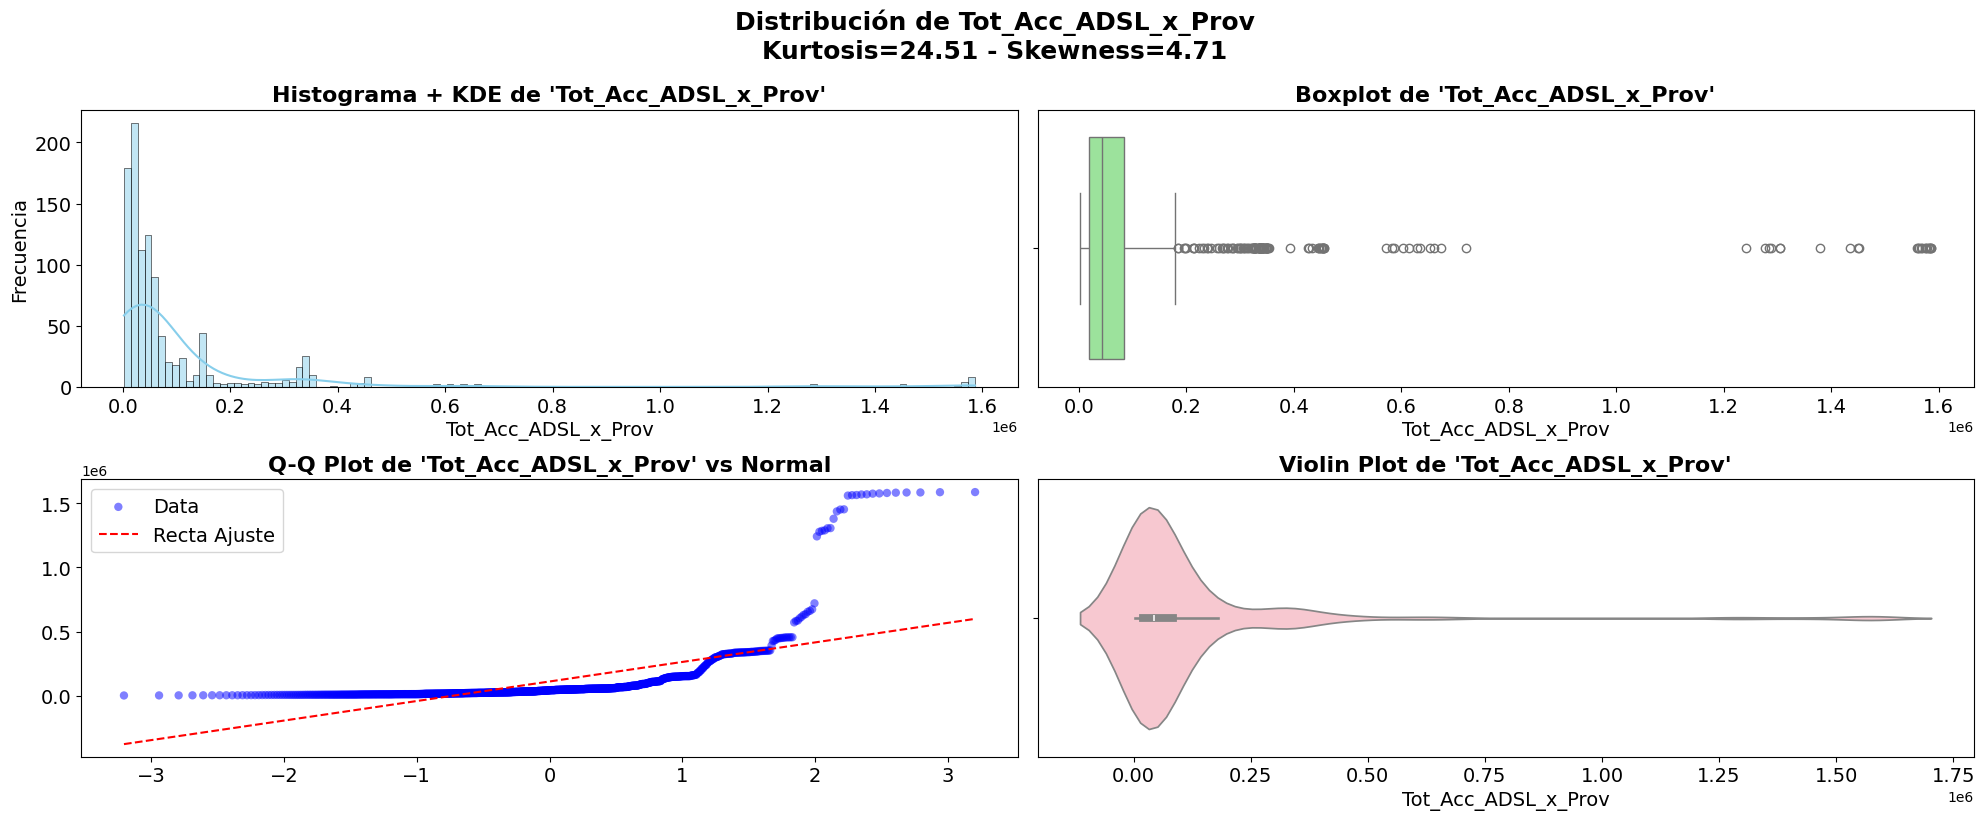

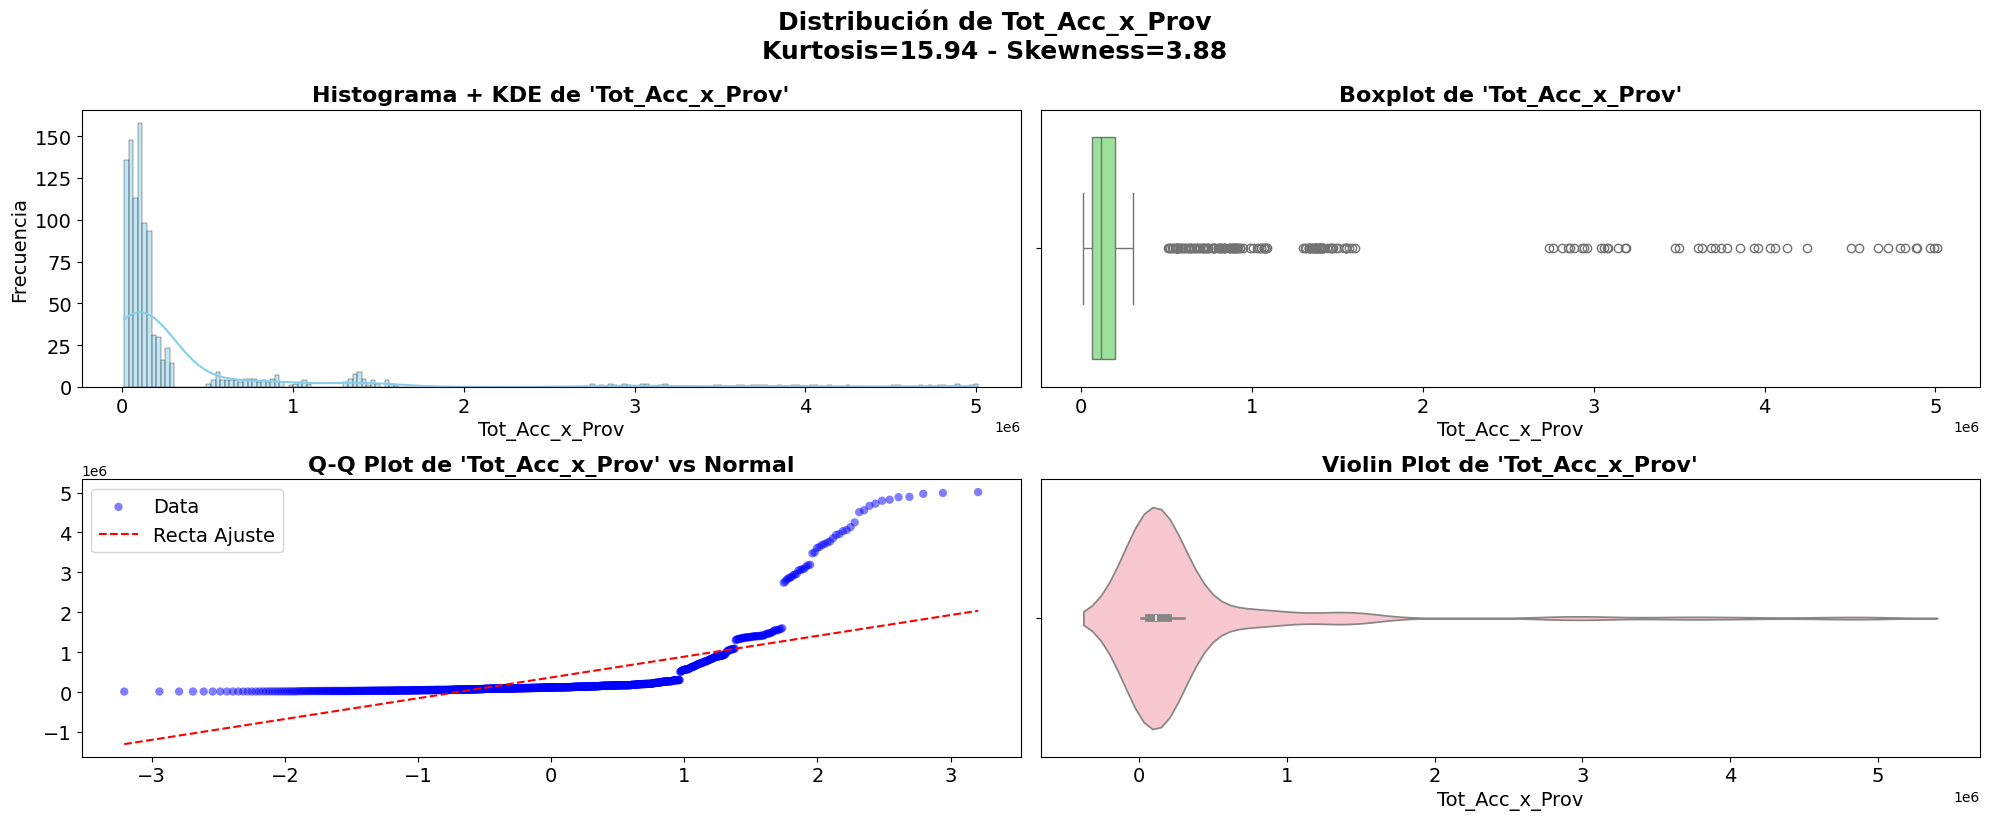

In [11]:
visualizacion_distribucion(df_internet_provincias, "Tot_Acc_ADSL_x_Prov", titulo="Distribución de Tot_Acc_ADSL_x_Prov")
visualizacion_distribucion(df_internet_provincias, "Tot_Acc_x_Prov", titulo="Distribución de Tot_Acc_x_Prov")

- [Tratamiento de Duplicados y Valores Faltantes]: En el caso de los campos "Año", "Trimestre" y "Provincia" se valida con la funcion "validar_df" las cantidades de datos unicos reflejan la realizada de la cantidad de años en el rango de 2014 a 2024, igualmente los cuatro trimestres y las 24 Provincias, para este ultimo campo ya en el ETL se habia realizado laidentificacion de nombres redundantes y se normalizaron.
A nivel de campos vacios o datos faltantes igualmente se validó en el ETL antes de fusionar hojas con campos comunes que la hoja "Accesos Por Tecnología" presentava unos campos vacios y obedecian a que en el excel adicionarion un comentario general dos filas despues de la data lo cual generaba ese efecto por lo cual se procedio a eliminar esas filas al final de la hoja.

- [Análisis Univariado]: Se realizó un análisis univariado de cada variable, con el fin de identificar patrones, tendencias y valores atípicos. Se utilizaron gráficos de caja y bigotes, histogramas y gráficos de densidad para visualizar la distribución de los datos.

    - [Revision de tipos de datos, tipos de variables]: En el proceso de ETL se había identificado la necesidad de unificar hojas del archivo de Excel original por compartir estructuras, dimensiones y campos; por ello, de forma previa, se realizó un casting a cada hoja según el contenido de cada campo. De este modo, se llegó a la conclusión de formatear las cifras y datos de acceso, penetración y velocidades de internet como tipo “float”.
En el caso de los años y trimestres, se determinó que debían ser tipo “int” (variables numéricas discretas).
Los nombres de las Provincias se definieron como tipo “category”, considerándose variables categóricas ordinales.
Por último, cabe recalcar que los datos de años y trimestres son variables numéricas discretas, mientras que el resto de los campos, al representar cantidades continuas, se representaron en float.

- **[5 Análisis Exploratorio EDA]**
- [Análisis Bivariado y Multivariado]
En esta fase el análisis de correlaciones se centra en la relación lineal entre las variables numéricas (int y float) que tenemos en los campos de los "df_internet_nacional" y "df_internet_provincias."
	- Cálculo de la matriz de correlación: se suele utilizar el método de Pearson (o Spearman, según la distribución de los datos) para evaluar la fuerza y dirección de la asociación.
	- Visualización: un heatmap de correlaciones (matriz de calor) resulta muy útil para identificar rápidamente patrones e asociación.
	•	Interpretación:
	•	Valores cercanos a 1 o -1 indican correlaciones fuertes (positivas o negativas, respectivamente).
	•	Valores cercanos a 0 indican que no existe (o es muy débil) la correlación lineal.
     - [Correlaciones]
     - [Relaciones Categóricas]

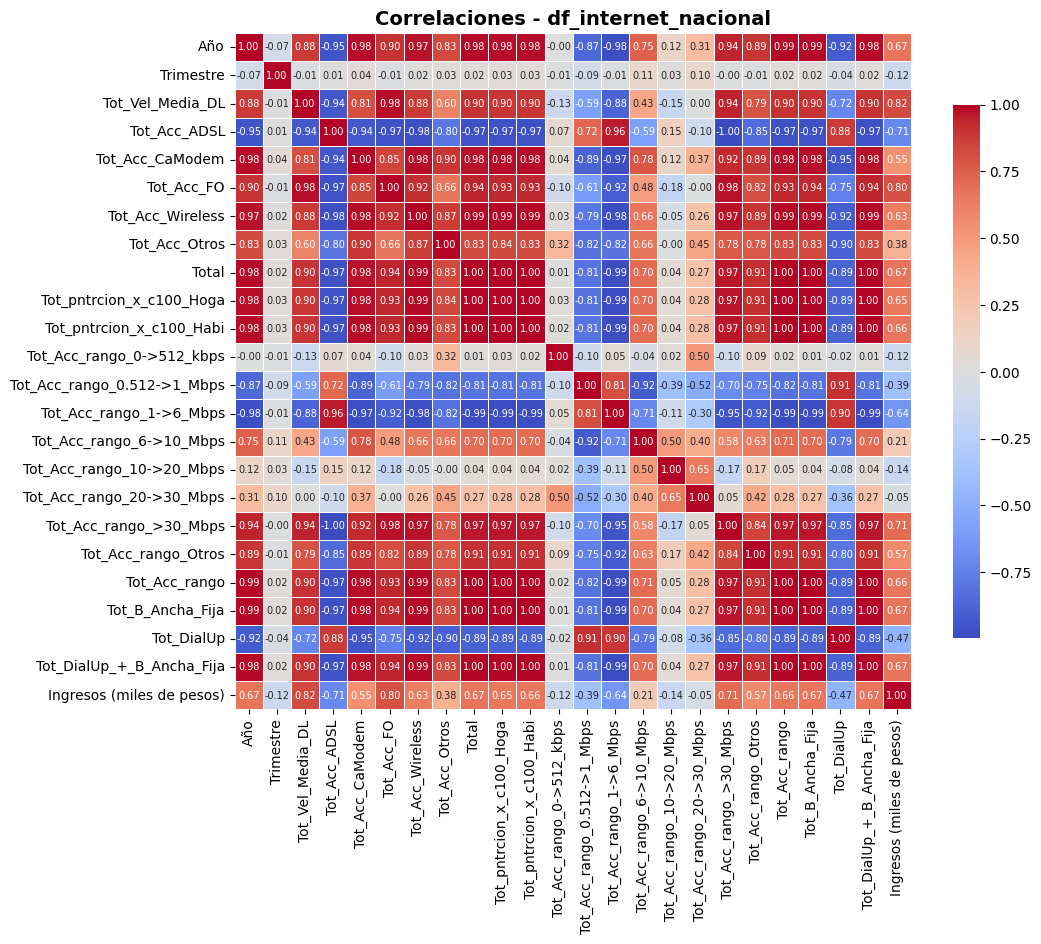

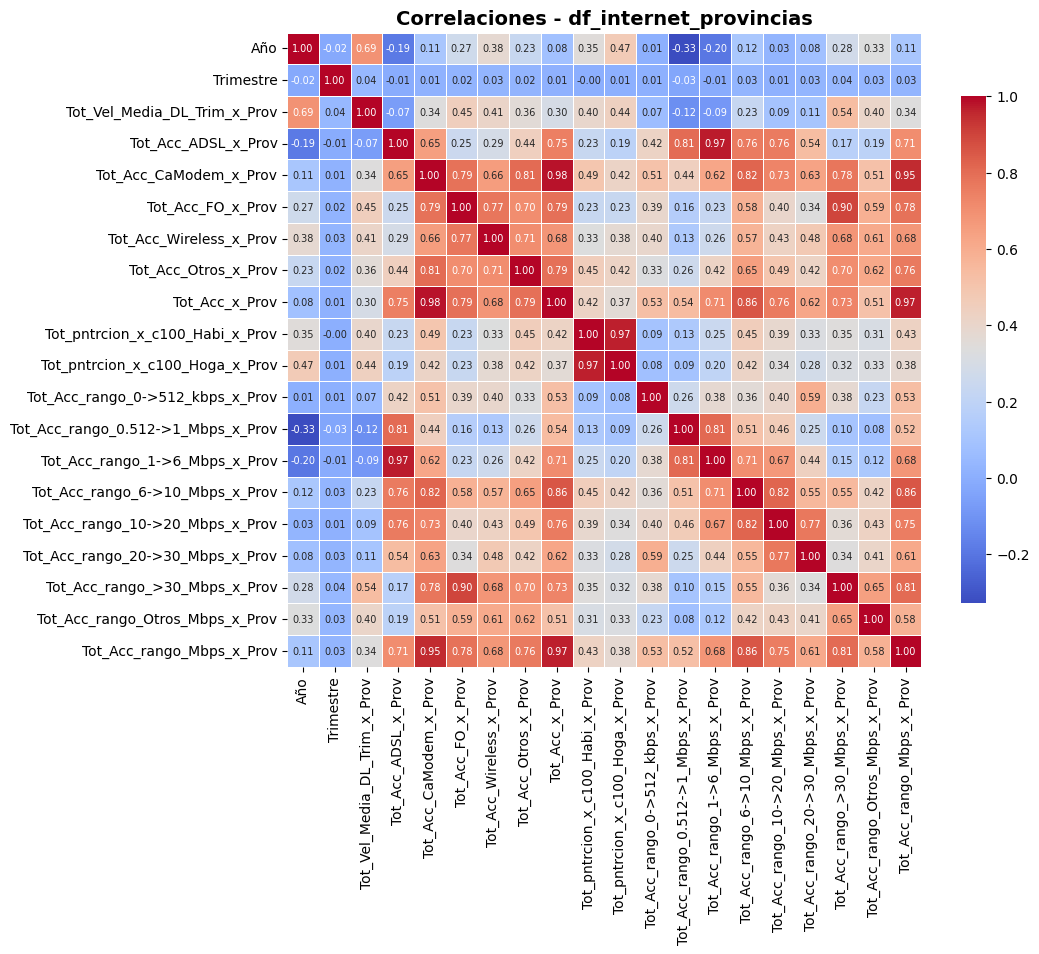

In [12]:
# Calculamos las correlaciones de los datasets df_internet_nacional y df_internet_provincias:
# Para df_internet_nacional
corr_nacional = calcular_correlaciones(df_internet_nacional, metodo="pearson")
plot_correlacion_heatmap(corr_nacional, titulo="Correlaciones - df_internet_nacional")

# Para df_internet_provincias
corr_prov = calcular_correlaciones(df_internet_provincias, metodo="pearson")
plot_correlacion_heatmap(corr_prov, titulo="Correlaciones - df_internet_provincias")

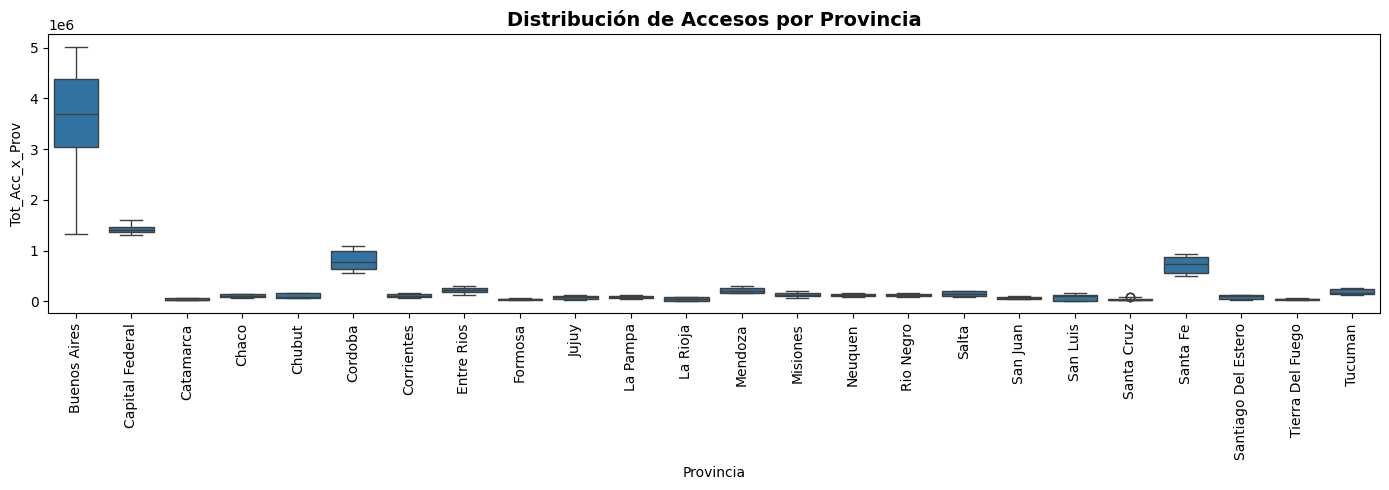

In [13]:
# 
boxplot_categ_num(df_internet_provincias, cat_col="Provincia", num_col="Tot_Acc_x_Prov", titulo="Distribución de Accesos por Provincia")

2. Análisis Multivariado

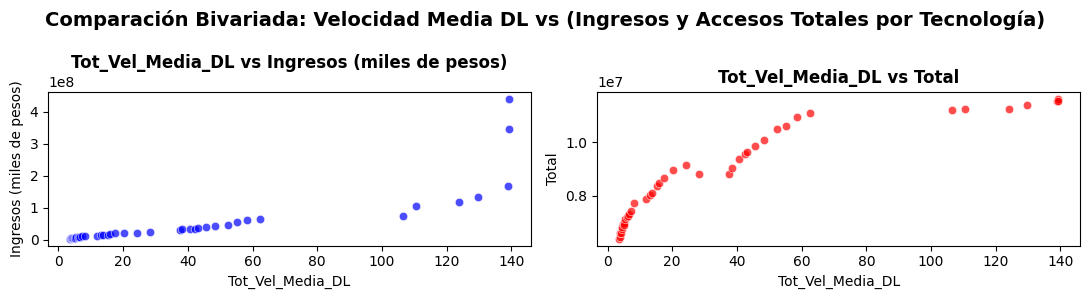

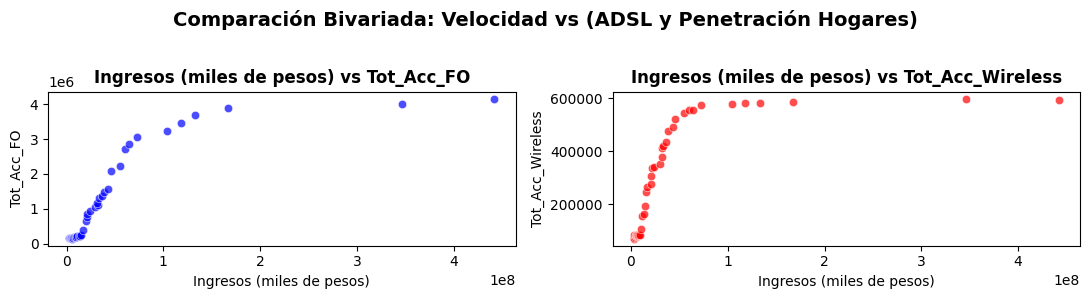

In [ ]:
# Comparamos graficamente la velocidad media de descarga (Tot_Vel_Media_DL) vs. el total de ingresos
# (Tot_Ingresos) y vs. los accesos totales por Tecnoogía a internet "Total": 
doble_grafico_bivariado(df=df_internet_nacional,
                        x1="Tot_Vel_Media_DL", y1="Ingresos (miles de pesos)",
                        x2="Tot_Vel_Media_DL", y2="Total",
                        titulo="Comparación Bivariada: Velocidad Media DL vs (Ingresos y Accesos Totales por Tecnología)")

# Comparamos graficamente los ingresos Totales (Ingresos (miles de pesos)) vs. el accesos total por tecnolgía
# tipo Fibra optica y tipo Wirellss (Tot_Acc_FO y Tot_Acc_Wireless) en el df_internet_nacional:
# (Tot_Ingresos) y vs. la penetración de internet por cada 100 hogares (Tot_pntrcion_x_c100_Hoga).
doble_grafico_bivariado(
                        df=df_internet_nacional,
                        x1="Ingresos (miles de pesos)", y1="Tot_Acc_FO",
                        x2="Ingresos (miles de pesos)", y2="Tot_Acc_Wireless",
                        titulo="Comparación Bivariada: Velocidad vs (ADSL y Penetración Hogares)")

############################################################################################################


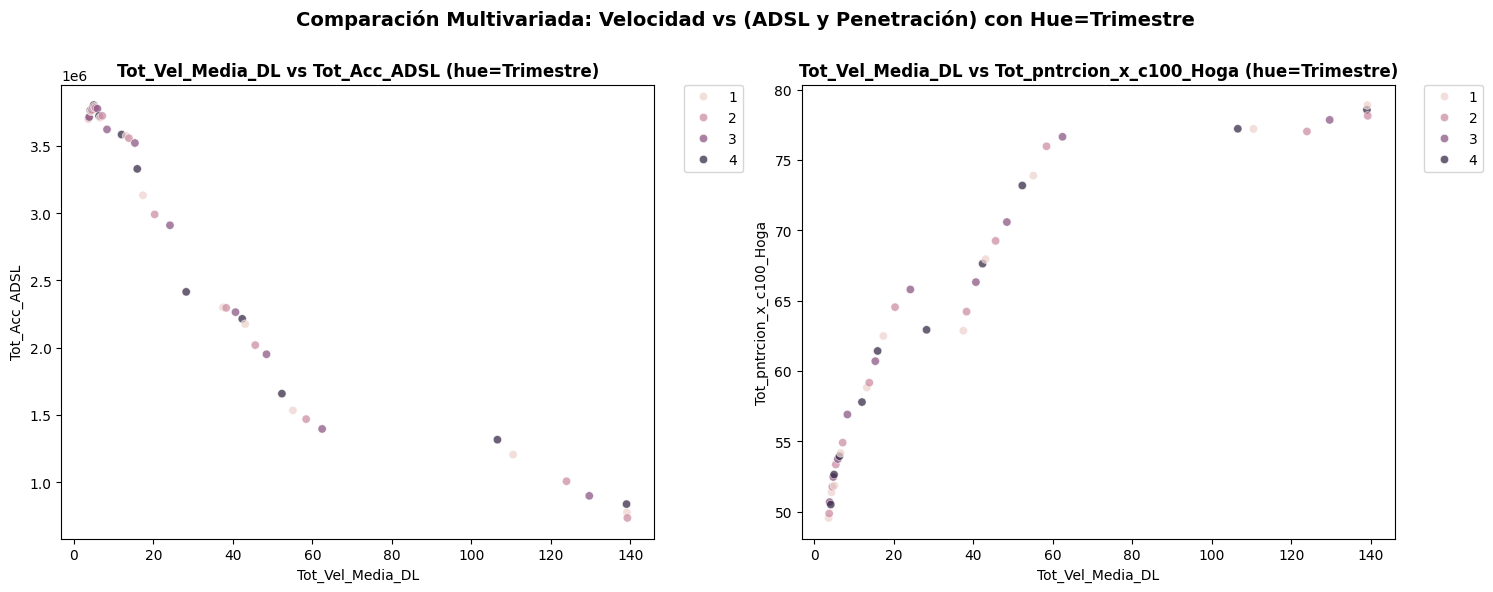

In [ ]:
multivariado_dos_en_una_fila(
     df=df_internet_nacional,
     x1="Tot_Vel_Media_DL", y1="Tot_Acc_ADSL", hue1="Trimestre",
     x2="Tot_Vel_Media_DL", y2="Tot_pntrcion_x_c100_Hoga", hue2="Trimestre",
     titulo="Comparación Multivariada: Velocidad vs (ADSL y Penetración) con Hue=Trimestre")

6. **[Hallazgos Destacados]**
   1.	Correlaciones y Patrones Generales
	•	A nivel nacional, se evidencia que los ingresos tienen correlaciones positivas bastante altas con el total de accesos (especialmente de ciertas tecnologías), sugiriendo que a mayor cantidad de accesos, mayor facturación.
	•	La velocidad media de descarga (Tot_Vel_Media_DL) muestra asociación positiva con ciertas tecnologías de mayor ancho de banda (por ejemplo, Fibra Óptica y CableModem), lo que indica que la expansión de estas tecnologías puede impulsar el aumento de la velocidad promedio.
	•	En el caso provincial (df_internet_provincias), la variable Tot_Vel_Media_DL_Trim_x_Prov tiende a relacionarse más fuertemente con accesos FO_x_Prov y CaModem_x_Prov que con ADSL_x_Prov, reforzando la idea de que la adopción de tecnologías más modernas eleva la velocidad media.
	2.	Distribución de Accesos por Provincia
	•	El boxplot de Tot_Acc_x_Prov muestra que Buenos Aires es la que concentra, con mucha diferencia, el mayor número de accesos, seguida por algunas provincias de población intermedia (ej.: Córdoba, Santa Fe). Varias provincias presentan valores significativamente menores, indicando una fuerte brecha regional.
	•	Provincias con menor población o densidad (La Pampa, Catamarca, Formosa, etc.) evidencian accesos mucho más bajos, pero la penetración (accesos cada 100 hogares o habitantes) podría no ser tan baja en algunos casos, lo que sugiere disparidades en términos de adopción.
	3.	Bivariado: Velocidad vs. Ingresos / Total Accesos
	•	Se observa que, a medida que la velocidad media DL aumenta, tiende a correlacionar positivamente con el total de accesos (gráfico en color rojo). Esto puede interpretarse como que las regiones o periodos con mayor velocidad promedio son también aquellos con mayor cantidad de accesos totales.
	•	La relación con los ingresos (gráfico en color azul) también muestra un comportamiento ascendente: a velocidades más altas, se registran ingresos más altos, posiblemente porque las tecnologías que ofrecen mayor velocidad suelen tener planes más costosos o mayor adopción en regiones con poder adquisitivo superior.
	4.	Bivariado: Ingresos vs. Accesos por Tecnología
	•	Comparando Ingresos con Tot_Acc_FO o Tot_Acc_Wireless, se ve una tendencia clara de crecimiento: cuando se incrementa el número de accesos en Fibra Óptica, por ejemplo, también se incrementan los ingresos. Esto refuerza la idea de que la adopción de tecnologías más rápidas o modernas puede impulsar la facturación.
	•	La pendiente de la nube de puntos para FO suele ser mayor que para Wireless, lo cual podría indicar que cada nuevo acceso FO aporta más ingresos en promedio que un acceso Wireless.
	5.	Bivariado: Velocidad vs. Penetración Hogares
	•	El scatter plot sugiere que regiones (o trimestres) con mayor velocidad media de descarga también suelen presentar penetraciones más altas en los hogares. Es decir, la disponibilidad de una buena velocidad podría alentar la adopción del servicio de internet, o viceversa, la alta adopción motiva la inversión en infraestructura de mayor velocidad.
	6.	Multivariado con Hue=Trimestre
	•	Al agregar la dimensión “Trimestre” como hue (color), se aprecia cómo la velocidad, los accesos y la penetración evolucionan en el tiempo. Se observan incrementos graduales en velocidad a lo largo de los trimestres (los puntos de trimestres más recientes tienden a ubicarse a la derecha en el eje de velocidad).
	•	Para accesos ADSL y penetración, se ve que en trimestres más recientes, la relación con la velocidad se mantiene, pero con una ligera disminución en ADSL si se compara con FO o CaModem.



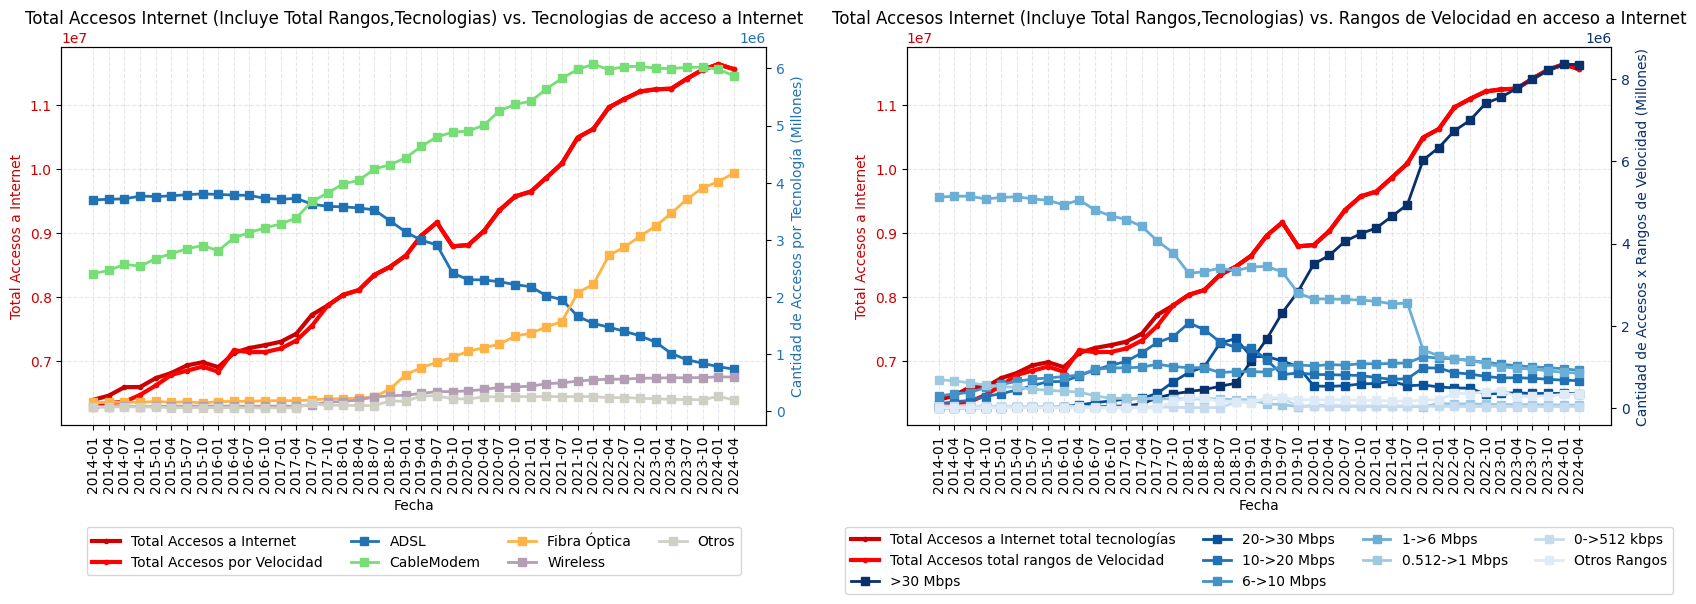

In [ ]:
# Graficas de la evolución de la penetración de internet por su tecnologia de acceso a nivel nacional:
# Creamos matriz para la impresion de los graficos de 2 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Grafica Total Penetración x cada 100 Hogares vs. Tecnologías usadas para accesar a Internet
graficar_listas_a_doble_eje(
    eje=ax1,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Total","Tot_Acc_rango"],
    labels_izq=["Total Accesos a Internet","Total Accesos por Velocidad"],
    cols_der=["Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros"],
    labels_der=["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"],
    label_eje_izq="Total Accesos a Internet",      
    label_eje_der="Cantidad de Accesos por Tecnología (Millones)",        
    titulo="Total Accesos Internet (Incluye Total Rangos,Tecnologias) vs. Tecnologias de acceso a Internet",
    ncol_leyenda=4,  
    rotar_x=90,     
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#2171B5","#77DD77","#FFB347","#B39EB5","#CFCFC4"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Grafica Total Penetración x cada 100 Hogares vs. Rangos de Velocidad usados en el acceso a Internet
graficar_listas_a_doble_eje(
    eje=ax2,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Total","Tot_Acc_rango"],
    labels_izq=["Total Accesos a Internet total tecnologías","Total Accesos total rangos de Velocidad"],
    cols_der=["Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_0->512_kbps","Tot_Acc_rango_Otros"],                                                       
    labels_der=[">30 Mbps","20->30 Mbps","10->20 Mbps","6->10 Mbps","1->6 Mbps","0.512->1 Mbps","0->512 kbps","Otros Rangos"],
    label_eje_izq="Total Accesos a Internet",      
    label_eje_der="Cantidad de Accesos x Rangos de Velocidad (Millones)",       
    titulo="Total Accesos Internet (Incluye Total Rangos,Tecnologias) vs. Rangos de Velocidad en acceso a Internet",
    ncol_leyenda=4,
    rotar_x=90,
    colores_izq=["#CC0000","#FF0000"],                  
    colores_der=["#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#9ECAE1","#C6DBEF","#DEEBF7"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)
plt.show()

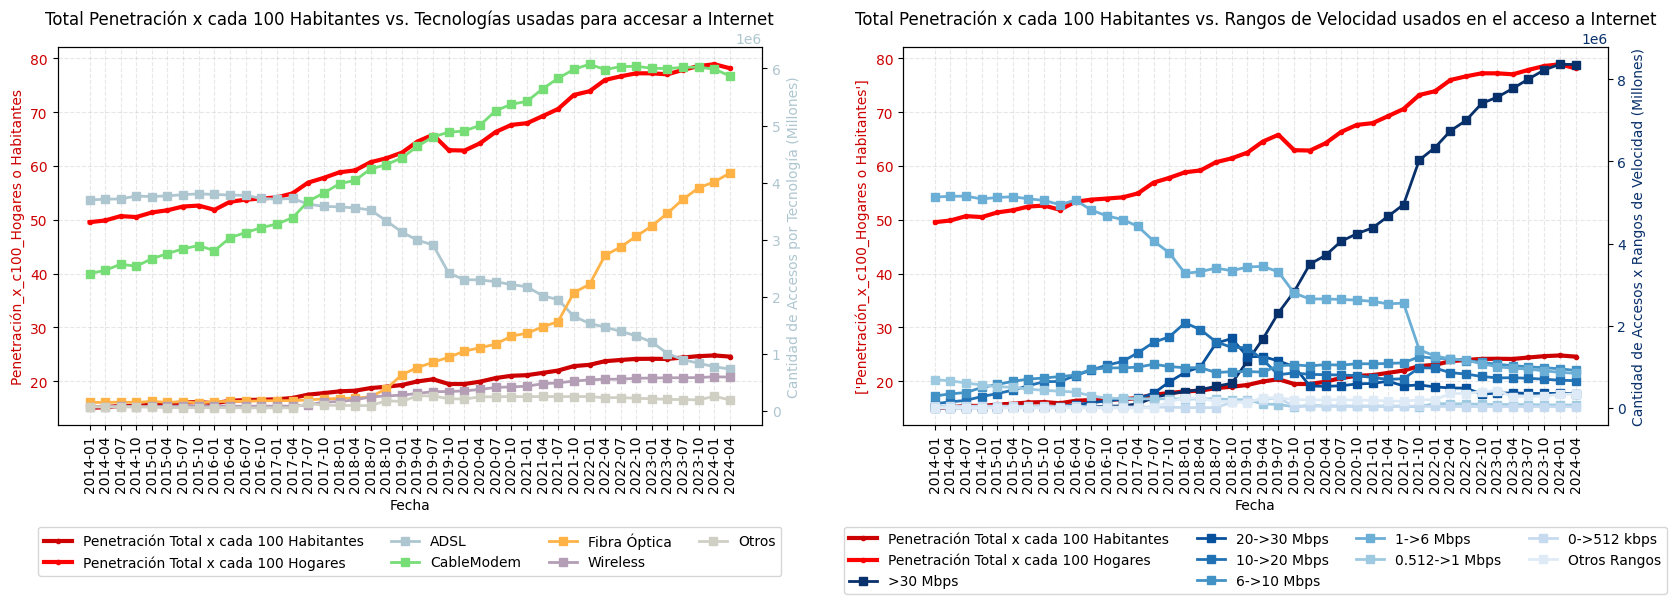

In [ ]:
# Graficas de la evolución de la penetración de internet xc100 hogares y xc100 Habitates Vs Rangos de Velocidad y tecnologías:
# Creamos matriz para la impresion de los graficos de 2 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# SUBPLOT 1: Total Penetración x cada 100 Hogares vs. Tecnologías usadas para accesar a Internet
graficar_listas_a_doble_eje(
    eje=ax1,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Tot_pntrcion_x_c100_Habi","Tot_pntrcion_x_c100_Hoga"],
    labels_izq=["Penetración Total x cada 100 Habitantes","Penetración Total x cada 100 Hogares"],
    cols_der=["Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros"],
    labels_der=["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"],
    label_eje_izq="Penetración_x_c100_Hogares o Habitantes",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos por Tecnología (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Penetración x cada 100 Habitantes vs. Tecnologías usadas para accesar a Internet",
    ncol_leyenda=4,  # Ajusta para la cantidad de líneas
    rotar_x=90,       # Rotación de las etiquetas del eje X
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#AEC6CF","#77DD77","#FFB347","#B39EB5","#CFCFC4"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# SUBPLOT 2: Total Penetración x cada 100 Hogares vs. Rangos de Velocidad usados en el acceso a Internet
graficar_listas_a_doble_eje(
    eje=ax2,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Tot_pntrcion_x_c100_Habi","Tot_pntrcion_x_c100_Hoga"],
    labels_izq=["Penetración Total x cada 100 Habitantes","Penetración Total x cada 100 Hogares"],
    cols_der=["Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_0->512_kbps","Tot_Acc_rango_Otros"],                                                       
    labels_der=[">30 Mbps","20->30 Mbps","10->20 Mbps","6->10 Mbps","1->6 Mbps","0.512->1 Mbps","0->512 kbps","Otros Rangos"],
    label_eje_izq=["Penetración_x_c100_Hogares o Habitantes"],      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos x Rangos de Velocidad (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Penetración x cada 100 Habitantes vs. Rangos de Velocidad usados en el acceso a Internet",
    ncol_leyenda=4,
    rotar_x=90,
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#9ECAE1","#C6DBEF","#DEEBF7"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)
plt.show()

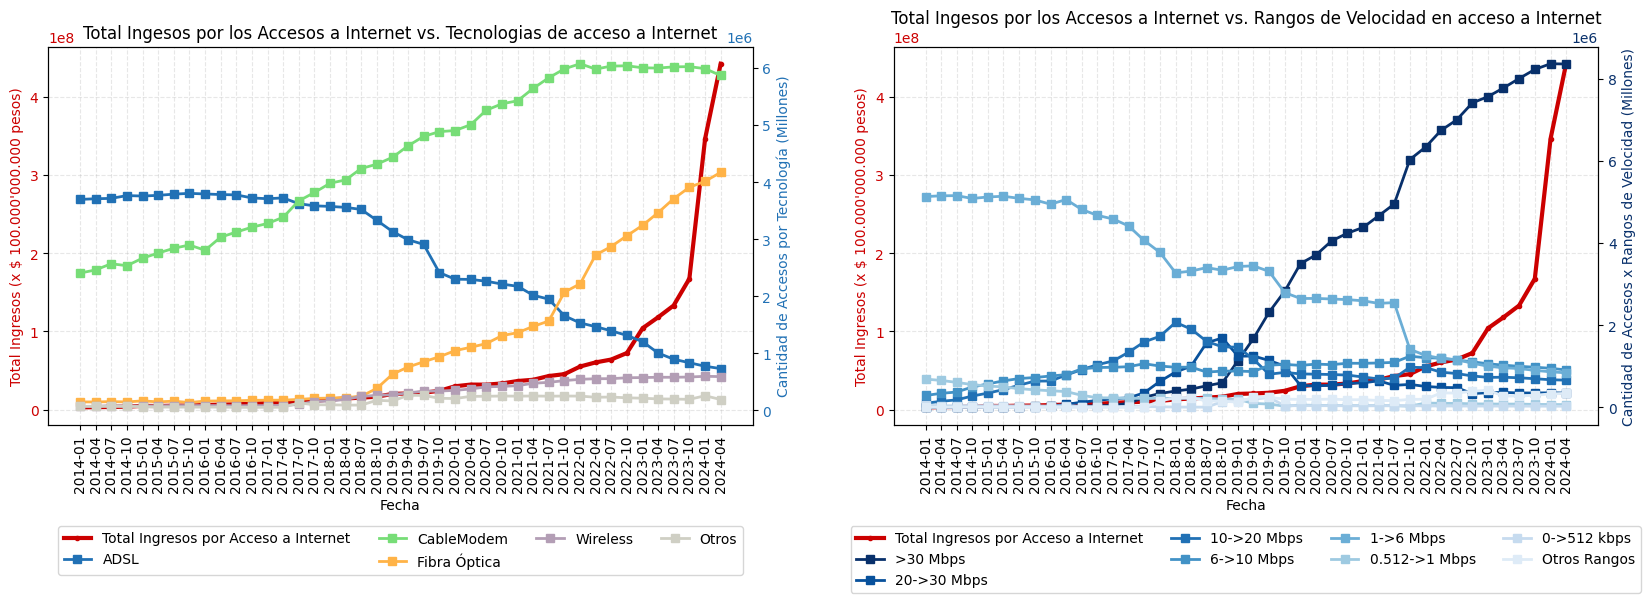

In [ ]:
# Graficas de la evolución de los Ingress pr acceso a Internet Vs Rangos de Velocidad y Tecnologias de Acceso a Internet:
# Creamos matriz para la impresion de los graficos de 2 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# SUBPLOT 1: Total Penetración x cada 100 Hogares vs. Tecnologías usadas para accesar a Internet
graficar_listas_a_doble_eje(
    eje=ax1,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Ingresos (miles de pesos)"],
    labels_izq=["Total Ingresos por Acceso a Internet"],
    cols_der=["Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros"],
    labels_der=["ADSL", "CableModem", "Fibra Óptica", "Wireless", "Otros"],
    label_eje_izq="Total Ingresos (x $ 100.000'000.000 pesos)",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos por Tecnología (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Ingesos por los Accesos a Internet vs. Tecnologias de acceso a Internet",
    ncol_leyenda=4,  # Ajusta para la cantidad de líneas
    rotar_x=90,       # Rotación de las etiquetas del eje X
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#2171B5","#77DD77","#FFB347","#B39EB5","#CFCFC4"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# SUBPLOT 2: Total Penetración x cada 100 Hogares vs. Rangos de Velocidad usados en el acceso a Internet
graficar_listas_a_doble_eje(
    eje=ax2,
    df=df_internet_nacional,
    col_x="Fecha",
    cols_izq=["Ingresos (miles de pesos)"],
    labels_izq=["Total Ingresos por Acceso a Internet"],
    cols_der=["Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_0.512->1_Mbps", "Tot_Acc_rango_0->512_kbps","Tot_Acc_rango_Otros"],                                                       
    labels_der=[">30 Mbps","20->30 Mbps","10->20 Mbps","6->10 Mbps","1->6 Mbps","0.512->1 Mbps","0->512 kbps","Otros Rangos"],
    label_eje_izq="Total Ingresos (x $ 100.000'000.000 pesos)",      # Etiqueta general del eje izquierdo (lo que va en eje.set_ylabel())
    label_eje_der="Cantidad de Accesos x Rangos de Velocidad (Millones)",        # Etiqueta general del eje derecho (lo que va en eje_derecho.set_ylabel())
    titulo="Total Ingesos por los Accesos a Internet vs. Rangos de Velocidad en acceso a Internet",
    ncol_leyenda=4,
    rotar_x=90,
    colores_izq=["#CC0000","#FF0000"],                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
    colores_der=["#08306B","#08519C","#2171B5","#4292C6","#6BAED6","#9ECAE1","#C6DBEF","#DEEBF7"]                   # Listas de colores para cada serie, Si es None, usamos la paleta por defecto
)

# Ajustar márgenes inferiores para que las leyendas no se corten
plt.subplots_adjust(bottom=0.25)
plt.show()

7. **[Conclusiones del EDA]**
- [Resumen de Insights]
   - Fuerte impacto de la tecnología: La adopción de tecnologías más rápidas (FO, CaModem) está fuertemente asociada a velocidades promedio más altas y mayores ingresos.
   - Diferencias regionales notables: Buenos Aires concentra la mayor parte de los accesos, mientras que otras provincias tienen cifras mucho menores; sin embargo, en términos de penetración, la brecha puede ser menor en algunas provincias.
	- Ingresos vinculados a mayor velocidad: Se corrobora que los planes de mayor velocidad y las regiones con mejor infraestructura tienden a generar más ingresos.
	- Evolución temporal: Se percibe una tendencia positiva en la velocidad y en ciertos accesos, con incrementos a lo largo de los trimestres, reflejando mejoras en infraestructura y adopción progresiva.
	- Fuerte impacto de la tecnología: La adopción de tecnologías más rápidas (FO, CaModem) está fuertemente asociada a velocidades promedio más altas y mayores ingresos.
	- Diferencias regionales notables: Buenos Aires concentra la mayor parte de los accesos, mientras que otras provincias tienen cifras mucho menores; sin embargo, en términos de penetración, la brecha puede ser menor en algunas provincias.
	- Ingresos vinculados a mayor velocidad: Se corrobora que los planes de mayor velocidad y las regiones con mejor infraestructura tienden a generar más ingresos.
	- Evolución temporal: Se percibe una tendencia positiva en la velocidad y en ciertos accesos, con incrementos a lo largo de los trimestres, reflejando mejoras en infraestructura y adopción progresiva.

8. **[Posibles lineas de Acción]**
   1.	Enfoque en Infraestructura de Alta Velocidad
	•	Fomentar la inversión en Fibra Óptica y CableModem, particularmente en provincias con menor penetración pero potencial de adopción, ya que esto podría traducirse en incrementos tanto en la velocidad promedio como en los ingresos totales.
	2.	Planes Especializados para Regiones Rezagadas
	•	Dado que la brecha en accesos es muy marcada entre Buenos Aires y el resto, diseñar planes y subsidios que incentiven la adopción en provincias con menor volumen de usuarios podría ayudar a equilibrar la penetración y expandir la base de clientes.
	3.	Ofertas Integrales que Combinen Velocidad y Costo
	•	La correlación positiva entre velocidad e ingresos sugiere que los usuarios valoran (y pagan por) un mejor servicio. Ofrecer planes escalonados (de alta velocidad con valor agregado) en regiones con capacidad adquisitiva, y planes básicos con subsidios en regiones más rezagadas, optimizaría el crecimiento.
	4.	Monitoreo de Tasa de Crecimiento y Penetración
	•	Continuar monitoreando de forma trimestral la penetración x cada 100 hogares y habitantes, junto con la velocidad media. Identificar estacionalidades y disparidades provinciales para ajustar la estrategia comercial y de inversión.
	5.	Refuerzo de Infraestructura en Proyectos Conjuntos
	•	Considerar alianzas con gobiernos provinciales para desplegar redes de alta velocidad, sobre todo donde la penetración está creciendo pero la velocidad se queda rezagada. Esto podría impulsar de forma simultánea la adopción y la calidad del servicio.

9. **[Generación Campos Calculados para PBI]**

In [ ]:
# Creamos columnas complementarias con información calculada a partir de los campos iniciales del DataFrame "df_internet_nacional":

# Creamos la columna "ARPU_x_Tecnología"
df_internet_nacional["ARPU_x_Tecnología"] = df_internet_nacional["Ingresos (miles de pesos)"] / df_internet_nacional["Total"]
# Creamos la columna "ARPU_x_Velocidad"
df_internet_nacional["ARPU_x_Rango_Velo"] = df_internet_nacional["Ingresos (miles de pesos)"] / df_internet_nacional["Tot_Acc_rango"]

# Creamos la columna Tasa de cresimiento de los ingresos en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Ingresos"] = ((df_internet_nacional["Ingresos (miles de pesos)"] - df_internet_nacional["Ingresos (miles de pesos)"].shift(1)) / df_internet_nacional["Ingresos (miles de pesos)"].shift(1)) * 100

# Creamos la la columna Tasa de Crecimiento Trimestral de los Ingresos en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Ingresos"] = ((df_internet_nacional["Ingresos (miles de pesos)"] - df_internet_nacional["Ingresos (miles de pesos)"].shift(1)) / df_internet_nacional["Ingresos (miles de pesos)"].shift(1)) * 100

# Creamos la columna Tasa de Crecimiento de Accesos en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Acce_x_Tecno"] = ((df_internet_nacional["Total"] - df_internet_nacional["Total"].shift(1)) / df_internet_nacional["Total"].shift(1)) * 100

# Calulamos la Tasa de Crecimiento de la penetración de internet en hogares y personas en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Hoga"] - df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(1)) / df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Habi"] - df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(1)) / df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(1)) * 100

# calculamos la tasa de crecimiento Interanual de la penetración de Internet por cada 100 hogares y por cada 100 habitantes en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga_YoY"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Hoga"] - df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(4)) / df_internet_nacional["Tot_pntrcion_x_c100_Hoga"].shift(4)) * 100
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi_YoY"] = ((df_internet_nacional["Tot_pntrcion_x_c100_Habi"] - df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(4)) / df_internet_nacional["Tot_pntrcion_x_c100_Habi"].shift(4)) * 100

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Tecnologia ("Tot_Acc_ADSL","Tot_Acc_CaModem","Tot_Acc_FO","Tot_Acc_Wireless","Tot_Acc_Otros") en el df_internet_nacional
df_internet_nacional["Tasa_Crec_Acc_ADSL"] = ((df_internet_nacional["Tot_Acc_ADSL"] - df_internet_nacional["Tot_Acc_ADSL"].shift(1)) / df_internet_nacional["Tot_Acc_ADSL"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_CaModem"] = ((df_internet_nacional["Tot_Acc_CaModem"] - df_internet_nacional["Tot_Acc_CaModem"].shift(1)) / df_internet_nacional["Tot_Acc_CaModem"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_FO"] = ((df_internet_nacional["Tot_Acc_FO"] - df_internet_nacional["Tot_Acc_FO"].shift(1)) / df_internet_nacional["Tot_Acc_FO"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_Wireless"] = ((df_internet_nacional["Tot_Acc_Wireless"] - df_internet_nacional["Tot_Acc_Wireless"].shift(1)) / df_internet_nacional["Tot_Acc_Wireless"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_Otros"] = ((df_internet_nacional["Tot_Acc_Otros"] - df_internet_nacional["Tot_Acc_Otros"].shift(1)) / df_internet_nacional["Tot_Acc_Otros"].shift(1)) * 100

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Rango de Velocidad ("Tot_Acc_rango_0_512_kbps","Tot_Acc_rango_0.512->1_Mbps","Tot_Acc_rango_1->6_Mbps","Tot_Acc_rango_6->10_Mbps","Tot_Acc_rango_10->20_Mbps","Tot_Acc_rango_20->30_Mbps","Tot_Acc_rango_>30_Mbps","Tot_Acc_rango_Otros") en el df_internet_nacional:
df_internet_nacional["Tasa_Crec_Acc_0->512_kbps"] = ((df_internet_nacional["Tot_Acc_rango_0->512_kbps"] - df_internet_nacional["Tot_Acc_rango_0->512_kbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_0->512_kbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_0.512->1_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_0.512->1_Mbps"] - df_internet_nacional["Tot_Acc_rango_0.512->1_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_0.512->1_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_1->6_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_1->6_Mbps"] - df_internet_nacional["Tot_Acc_rango_1->6_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_1->6_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_6->10_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_6->10_Mbps"] - df_internet_nacional["Tot_Acc_rango_6->10_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_6->10_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_10->20_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_10->20_Mbps"] - df_internet_nacional["Tot_Acc_rango_10->20_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_10->20_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_20->30_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_20->30_Mbps"] - df_internet_nacional["Tot_Acc_rango_20->30_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_20->30_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_>30_Mbps"] = ((df_internet_nacional["Tot_Acc_rango_>30_Mbps"] - df_internet_nacional["Tot_Acc_rango_>30_Mbps"].shift(1)) / df_internet_nacional["Tot_Acc_rango_>30_Mbps"].shift(1)) * 100
df_internet_nacional["Tasa_Crec_Acc_Otros"] = ((df_internet_nacional["Tot_Acc_rango_Otros"] - df_internet_nacional["Tot_Acc_rango_Otros"].shift(1)) / df_internet_nacional["Tot_Acc_rango_Otros"].shift(1)) * 100

# Limpiamos cualquier valor almacenado en los nuevos campos ("Tasa_Crec_Accesos","Tasa_Crec_Pntracion_Hogares","Tasa_Crec_Pntracion_Habitantes","Tasa_Crec_Acc_ADSL","Tasa_Crec_Acc_CaModem","Tasa_Crec_Acc_FO","Tasa_Crec_Acc_Wireless","Tasa_Crec_Acc_Otros","Tasa_Crec_Acc_0_512_kbps","Tasa_Crec_Acc_0.512_1_Mbps","Tasa_Crec_Acc_1_6_Mbps","Tasa_Crec_Acc_6_10_Mbps","Tasa_Crec_Acc_10_20_Mbps","Tasa_Crec_Acc_20_30_Mbps","Tasa_Crec_Acc_>30_Mbps","Tasa_Crec_Pntcion_xc100_Hoga","Tasa_Crec_Pntcion_xc100_Habi") producto de division en cero que pueda generar problema posteriormente y le reemplazamos por cero:
df_internet_nacional["Tasa_Crec_Acce_x_Tecno"] = df_internet_nacional["Tasa_Crec_Acce_x_Tecno"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga"] = df_internet_nacional["Tasa_Crec_Pntcion_xc100_Hoga"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi"] = df_internet_nacional["Tasa_Crec_Pntcion_xc100_Habi"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_ADSL"] = df_internet_nacional["Tasa_Crec_Acc_ADSL"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_CaModem"] = df_internet_nacional["Tasa_Crec_Acc_CaModem"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_FO"] = df_internet_nacional["Tasa_Crec_Acc_FO"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_Wireless"] = df_internet_nacional["Tasa_Crec_Acc_Wireless"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_Otros"] = df_internet_nacional["Tasa_Crec_Acc_Otros"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_0->512_kbps"] = df_internet_nacional["Tasa_Crec_Acc_0->512_kbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_0.512->1_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_0.512->1_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_1->6_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_1->6_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_6->10_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_6->10_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_10->20_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_10->20_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_20->30_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_20->30_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_>30_Mbps"] = df_internet_nacional["Tasa_Crec_Acc_>30_Mbps"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_nacional["Tasa_Crec_Acc_Otros"] = df_internet_nacional["Tasa_Crec_Acc_Otros"].replace([np.inf, -np.inf], np.nan).fillna(0)

############################################################################################################################################################################

# Aseguramos orden por Provincia y Fecha
df_internet_provincias.sort_values(["Provincia", "Fecha"], inplace=True)
grupo = df_internet_provincias.groupby("Provincia") # Creamos el groupby por Provincia

# Creamos la columna Tasa de Crecimiento de Accesos por Provincia en el df_internet_provincias:, 
# Usamos pct_change dentro de apply, y reseteamos el índice:
df_internet_provincias["Tasa_Crec_Accesos_x_Prov"] = (grupo["Tot_Acc_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True)) 

# Calculamos la Tasa de Crecimiento de la penetración de internet por cada 100 Hogares y por cada 100 Habitantes en el df_internet_provincias
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov"] = (grupo["Tot_pntrcion_x_c100_Hoga_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov"] = (grupo["Tot_pntrcion_x_c100_Habi_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))

# Función para calcular la tasa de crecimiento Interanual (YOY) donde comparamos el valor actual con el de 4 trimestres atrás:
def yoy_growth(series):
    return (series - series.shift(4)) / series.shift(4) * 100

# Calculamos la tasa de crecimiento Interanual (YOY) de la penetración por cada 100 hogares y por cada 100 Habitantes
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov_YoY"] = (grupo["Tot_pntrcion_x_c100_Hoga_x_Prov"].transform(yoy_growth))
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov_YoY"] = (grupo["Tot_pntrcion_x_c100_Habi_x_Prov"].transform(yoy_growth))

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Tecnologia por Provincia ("Tot_Acc_ADSL_x_Prov","Tot_Acc_CaModem_x_Prov","Tot_Acc_FO_x_Prov","Tot_Acc_Wireless_x_Prov","Tot_Acc_Otros_x_Prov") en el df_internet_provincias:
df_internet_provincias["Tasa_Crec_Acc_ADSL_x_Prov"] = (grupo["Tot_Acc_ADSL_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_CaModem_x_Prov"] = (grupo["Tot_Acc_CaModem_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_FO_x_Prov"] = (grupo["Tot_Acc_FO_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_Wireless_x_Prov"] = (grupo["Tot_Acc_Wireless_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_Otros_x_Prov"] = (grupo["Tot_Acc_Otros_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))

# Creamos las columnas de Tasa de Crecimiento de accesos para cada Rango de Velocidad por Provincia ("Tot_Acc_rango_0->512_kbps_x_Prov","Tot_Acc_rango_0.512->1_Mbps_x_Prov","Tot_Acc_rango_1->6_Mbps_x_Prov","Tot_Acc_rango_6->10_Mbps_x_Prov","Tot_Acc_rango_10->20_Mbps_x_Prov","Tot_Acc_rango_20->30_Mbps_x_Prov","Tot_Acc_rango_>30_Mbps_x_Prov","Tot_Acc_rango_Otros_Mbps_x_Prov") en el df_internet_provincias:
df_internet_provincias["Tasa_Crec_Acc_rango_0->512_kbps_x_Prov"] = (grupo["Tot_Acc_rango_0->512_kbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_0.512->1_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_0.512->1_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_1->6_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_1->6_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_6->10_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_6->10_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_10->20_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_10->20_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_20->30_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_20->30_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_>30_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_>30_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))
df_internet_provincias["Tasa_Crec_Acc_rango_Otros_Mbps_x_Prov"] = (grupo["Tot_Acc_rango_Otros_Mbps_x_Prov"].transform(lambda s: s.pct_change() * 100).reset_index(level=0, drop=True))

# Limpiamos cualquier valor almacenado en los nuevos campos ("Tasa_Crec_Accesos_Prov","Tasa_Crec_Pntracion_Hogares_Prov","Tasa_Crec_Pntracion_Habitantes_Prov","Tasa_Crec_Acc_ADSL_Prov","Tasa_Crec_Acc_CaModem","Tasa_Crec_Acc_FO","Tasa_Crec_Acc_Wireless","Tasa_Crec_Acc_Otros","Tasa_Crec_Acc_0_512_kbps","Tasa_Crec_Acc_0.512_1_Mbps","Tasa_Crec_Acc_1_6_Mbps","Tasa_Crec_Acc_6_10_Mbps","Tasa_Crec_Acc_10_20_Mbps","Tasa_Crec_Acc_20_30_Mbps","Tasa_Crec_Acc_>30_Mbps","Tasa_Crec_Pntcion_xc100_Hoga","Tasa_Crec_Pntcion_xc100_Habi") producto de division en cero que pueda generar problema posteriormente y le reemplazamos por cero:
df_internet_provincias["Tasa_Crec_Accesos_x_Prov"] = df_internet_provincias["Tasa_Crec_Accesos_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov"] = df_internet_provincias["Tasa_Crec_Pntcion_xc100_Hoga_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov"] = df_internet_provincias["Tasa_Crec_Pntcion_xc100_Habi_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_ADSL_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_ADSL_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_CaModem_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_CaModem_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_FO_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_FO_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_Wireless_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_Wireless_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_Otros_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_Otros_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_0->512_kbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_0->512_kbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_0.512->1_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_0.512->1_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_1->6_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_1->6_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_6->10_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_6->10_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_10->20_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_10->20_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_20->30_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_20->30_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_>30_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_>30_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)
df_internet_provincias["Tasa_Crec_Acc_rango_Otros_Mbps_x_Prov"] = df_internet_provincias["Tasa_Crec_Acc_rango_Otros_Mbps_x_Prov"].replace([np.inf, -np.inf], np.nan).fillna(0)

In [32]:
# Guardamos los dataframe con los campos adicionales asociados a fecha y otros calculos para alimentar el PowerBI
df_internet_nacional.to_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processed/df_internet_nacional.parquet')
df_internet_provincias.to_parquet('/Users/usuario/Documents/M7_LABs_PI/mvp_pi2/data/processeddf_internet_provincias.parquet')